In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.io as scio
import sys
sys.path.append('../lib/sharpy/')
import sharpy.utils.h5utils as h5utils
import h5py
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
%config InlineBackend.figure_format = 'retina'

# Straight Wing at 0 degree angle of attack

In [3]:
uvlm = scio.loadmat('output/test_pazy_M16N1Ms16_alpha0000_skin1/pazy_uinf0010_alpha0000/savedata/pazy_uinf0010_alpha0000.uvlmss.mat')

In [5]:
path_to_freqresp = './output/test_pazy_M16N1Ms16_alpha0000_skin1/pazy_uinf0100_alpha000/frequencyresponse/aerodynamic.freqresp.h5'
path_to_freqresp = './output/test_pazy_M16N1Ms16_alpha0000_skin1/pazy_uinf0010_alpha0000/frequencyresponse/aerodynamic.freqresp.h5'
with h5py.File(path_to_freqresp, 'r') as f:
    uvlm = h5utils.load_h5_in_dict(f)

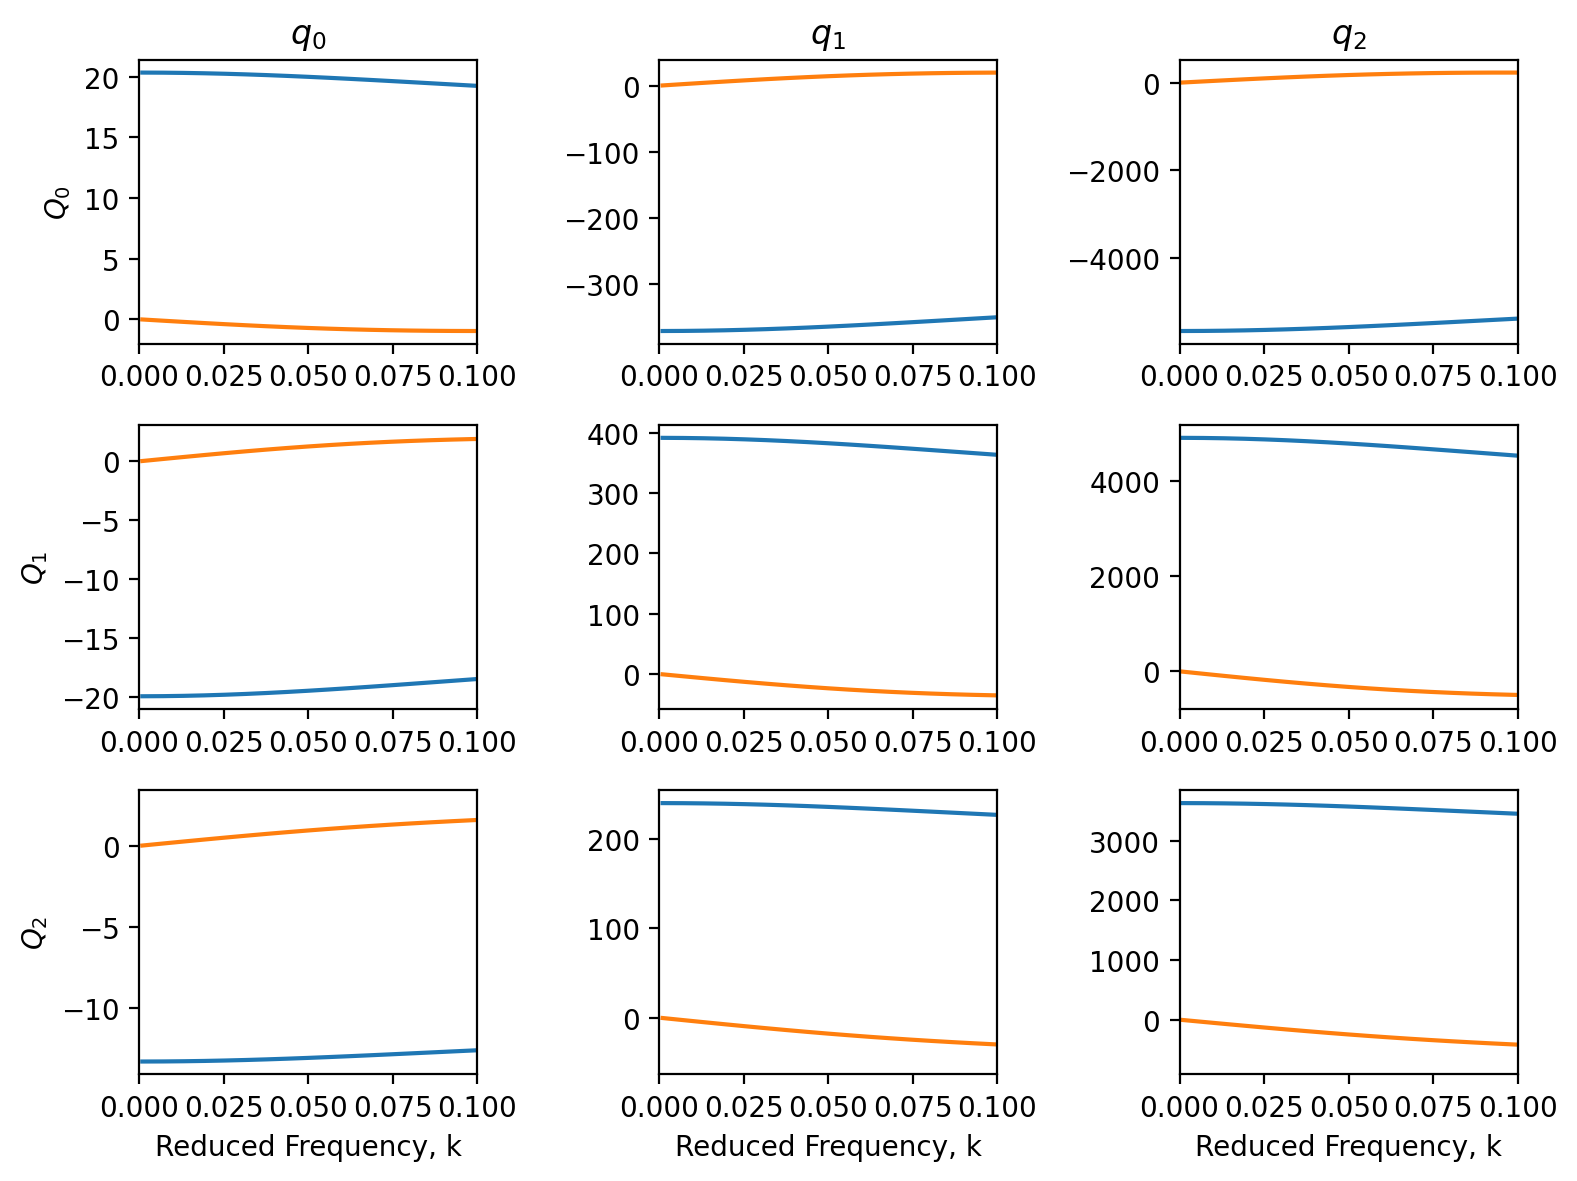

In [6]:
m_list = [0, 1, 2]
p_list = [0, 1, 2]

fig, ax = plt.subplots(nrows=len(p_list), ncols=len(m_list))

for r in range(len(p_list)):
    for c in range(len(m_list)):
        ax[r, c].plot(uvlm['frequency'], uvlm['response'][p_list[r], m_list[c], :].real)
        ax[r, c].plot(uvlm['frequency'], uvlm['response'][p_list[r], m_list[c], :].imag)

        ax[r, c].set_xlim(0, 0.1)
        
        if c == 0:
            ax[r, c].set_ylabel('$Q_%g$'% r)
        if r == 0:
            ax[r, c].set_title('$q_%g$'% c)
        if r == 2:
            ax[r, c].set_xlabel('Reduced Frequency, k')
    
plt.tight_layout()

# Angle of attack = 5

/home/ng213/anaconda3/envs/sharpy_env/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


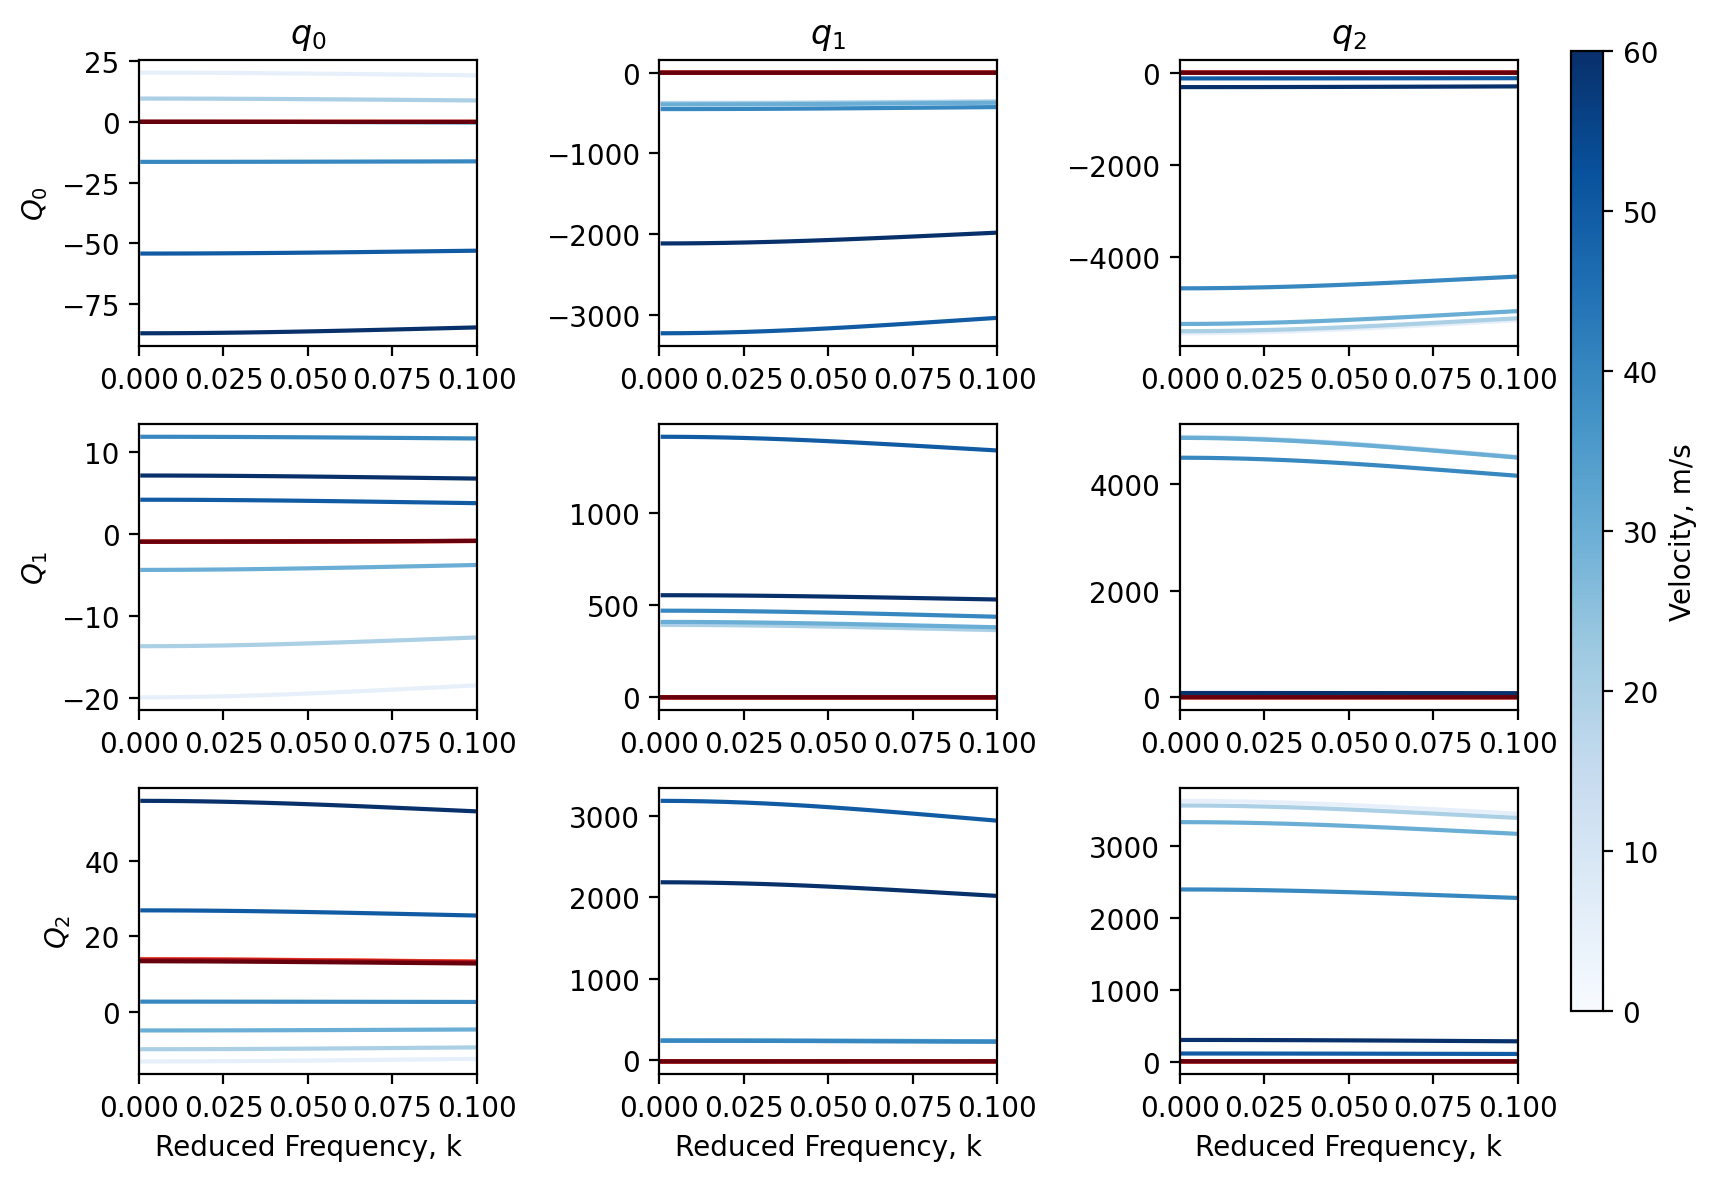

In [7]:
m_list = [0, 1, 2]
p_list = [0, 1, 2]
u_inf_vec = [20, 30, 40, 50, 60]
output_path = './output/postprocess/'
cmap=plt.get_cmap('Blues')
cmap2=plt.get_cmap('Reds')

nrm = plt.Normalize(vmin=0, vmax=60)

fig, ax = plt.subplots(nrows=len(p_list), ncols=len(m_list))

for u_inf in u_inf_vec:
    for r in range(len(p_list)):
        for c in range(len(m_list)):
            yfreq = np.loadtxt(output_path + '/sharpy_uinf{:04g}_aero_skin1/in{:02g}_out{:02g}.txt'.format(u_inf, m_list[c], p_list[r]))
            mrmfreq = np.loadtxt(output_path + '/mrm_umbeam_w_skin_qhh_uinf{:04g}_alpha0500/in{:02g}_out{:02g}.txt'.format(u_inf * 10, m_list[c], p_list[r]))
            w_to_k = 0.05/u_inf
            
            if u_inf == 20:
                pass
                ax[r, c].plot(uvlm['frequency'], uvlm['response'][p_list[r], m_list[c], :].real, c=cmap(nrm(5)))
#             ax[r, c].plot(uvlm['frequency'], uvlm['response'][p_list[r], m_list[c], :].imag)
            ax[r, c].plot(yfreq[:, 0], yfreq[:, 1], c=cmap(nrm(u_inf)))
            ax[r, c].plot(mrmfreq[:, 0], mrmfreq[:, 1], c=cmap2(nrm(u_inf)))


#             ax[r, c].plot(yfreq[:, 0], yfreq[:, 2], c=cmap2(nrm(u_inf)))
            
            ax[r, c].set_xlim(0, 0.1)

            if c == 0:
                ax[r, c].set_ylabel('$Q_{%g}$'% p_list[r])
            if r == 0:
                ax[r, c].set_title('$q_{%g}$'% m_list[c])
            if r == 2:
                ax[r, c].set_xlabel('Reduced Frequency, k')
    
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.99, 0.15, 0.02, 0.8])
fig.colorbar(mpl.cm.ScalarMappable(norm=nrm, cmap='Blues'), label='Velocity, m/s', cax=cbar_ax)

plt.tight_layout()
# plt.savefig('../figures/UVLM_real.pdf')

/home/ng213/anaconda3/envs/sharpy_env/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


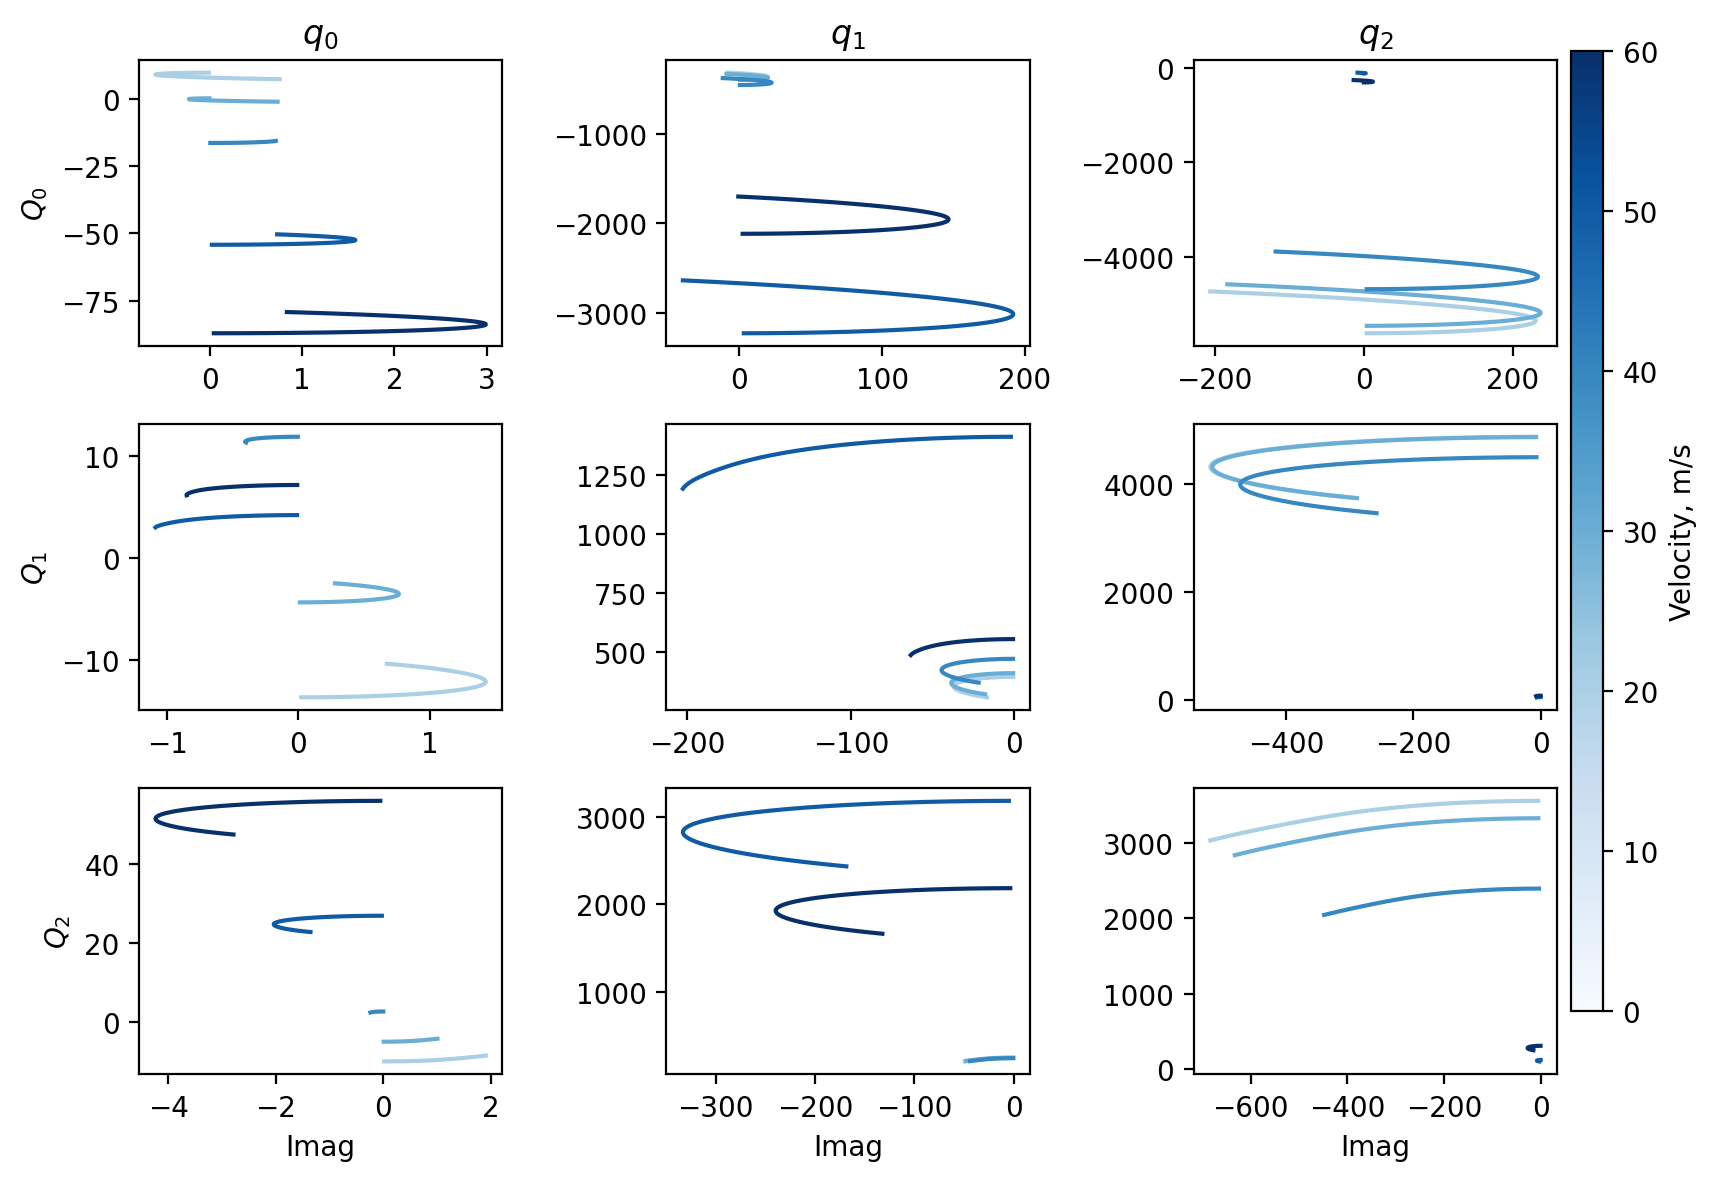

In [14]:
m_list = [0, 1, 2]
p_list = [0, 1, 2]
u_inf_vec = [20, 30, 40, 50, 60]
output_path = './output/postprocess/'
cmap=plt.get_cmap('Blues')
cmap2=plt.get_cmap('Reds')

nrm = plt.Normalize(vmin=0, vmax=60)

fig, ax = plt.subplots(nrows=len(p_list), ncols=len(m_list))

for u_inf in u_inf_vec:
    for r in range(len(p_list)):
        for c in range(len(m_list)):
            yfreq = np.loadtxt(output_path + '/sharpy_uinf{:04g}_aero_skin1/in{:02g}_out{:02g}.txt'.format(u_inf, m_list[c], p_list[r]))
            mrmfreq = np.loadtxt(output_path + '/mrm_umbeam_w_skin_qhh_uinf{:04g}_alpha0500/in{:02g}_out{:02g}.txt'.format(u_inf * 10, m_list[c], p_list[r]))
            w_to_k = 0.05/u_inf
            
            if u_inf == 20:
                pass
#                 ax[r, c].plot(uvlm['frequency'], uvlm['response'][p_list[r], m_list[c], :].real, c=cmap(nrm(5)))
#             ax[r, c].plot(uvlm['frequency'], uvlm['response'][p_list[r], m_list[c], :].imag)
            ax[r, c].plot(yfreq[:, 2], yfreq[:, 1], c=cmap(nrm(u_inf)))
#             ax[r, c].plot(mrmfreq[:, 0], mrmfreq[:, 1], c=cmap2(nrm(u_inf)))


#             ax[r, c].plot(yfreq[:, 0], yfreq[:, 2], c=cmap2(nrm(u_inf)))
            
#             ax[r, c].set_xlim(0, 0.1)

            if c == 0:
                ax[r, c].set_ylabel('$Q_{%g}$'% p_list[r])
            if r == 0:
                ax[r, c].set_title('$q_{%g}$'% m_list[c])
            if r == 2:
                ax[r, c].set_xlabel('Imag')
    
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.99, 0.15, 0.02, 0.8])
fig.colorbar(mpl.cm.ScalarMappable(norm=nrm, cmap='Blues'), label='Velocity, m/s', cax=cbar_ax)

plt.tight_layout()

/home/ng213/anaconda3/envs/sharpy_env/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


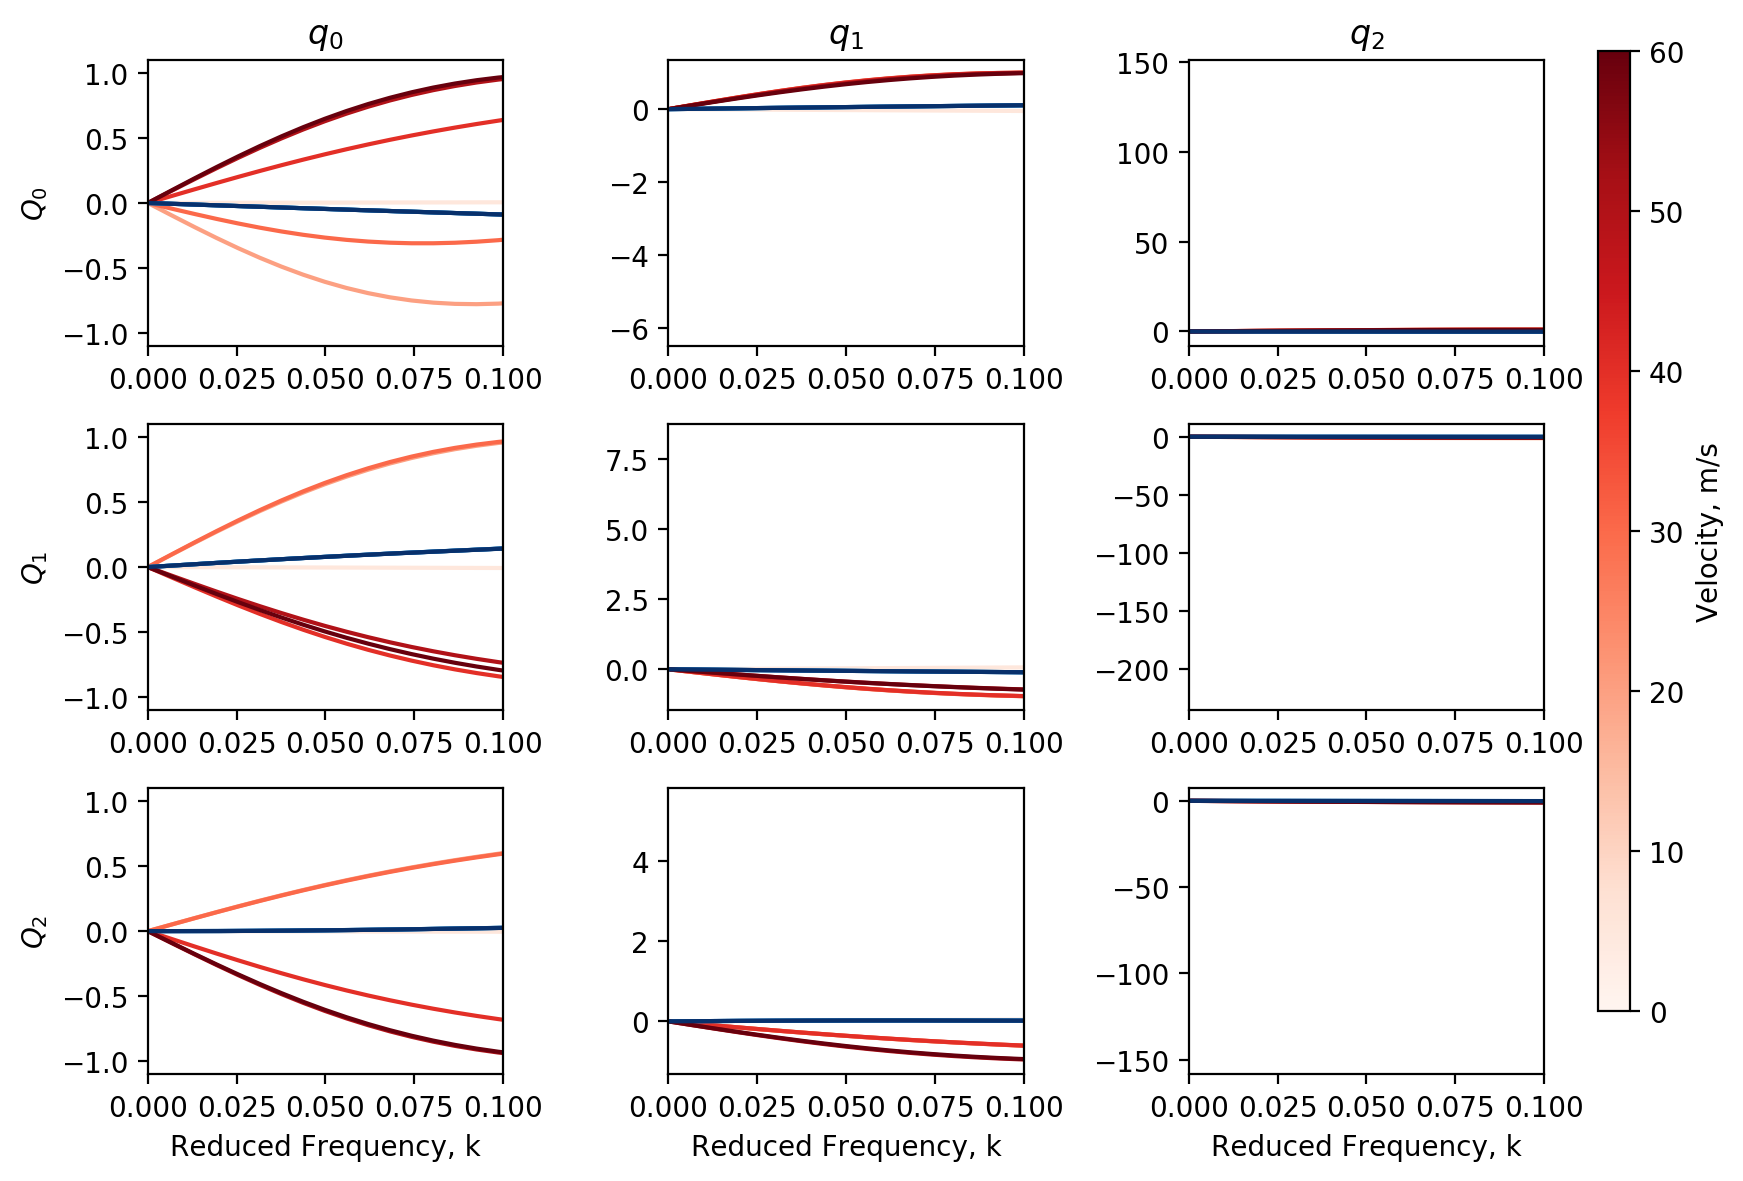

In [167]:
m_list = [0, 1, 2]
p_list = [0, 1, 2]
u_inf_vec = [20, 30, 40, 50, 60]
output_path = './output/postprocess/'
cmap=plt.get_cmap('Blues')
cmap2=plt.get_cmap('Reds')

nrm = plt.Normalize(vmin=0, vmax=60)

fig, ax = plt.subplots(nrows=len(p_list), ncols=len(m_list))

for u_inf in u_inf_vec:
    for r in range(len(p_list)):
        for c in range(len(m_list)):
            yfreq = np.loadtxt(output_path + '/sharpy_uinf{:04g}_aero_skin1/in{:02g}_out{:02g}.txt'.format(u_inf, m_list[c], p_list[r]))
            mrmfreq = np.loadtxt(output_path + '/mrm_umbeam_w_skin_qhh_uinf{:04g}_alpha0500/in{:02g}_out{:02g}.txt'.format(u_inf * 10, m_list[c], p_list[r]))


            w_to_k = 0.05/u_inf
            
            if u_inf ==20:
                pass
                ax[r, c].plot(uvlm['frequency'][:3], uvlm['response'][p_list[r], m_list[c], :3].imag, c=cmap2(nrm(5)))
#             ax[r, c].plot(uvlm['frequency'], uvlm['response'][p_list[r], m_list[c], :].imag)
#             ax[r, c].plot(yfreq[:, 0], yfreq[:, 1], c=cmap(nrm(u_inf)))
            ax[r, c].plot(yfreq[:, 0], yfreq[:, 2] / np.max(np.abs(yfreq[:, 2])), c=cmap2(nrm(u_inf)))
            ax[r, c].plot(mrmfreq[:, 0], mrmfreq[:, 2] / np.max(np.abs(mrmfreq[:, 2])), c=cmap(nrm(u_inf)))


            
            ax[r, c].set_xlim(0, 0.1)

            if c == 0:
                ax[r, c].set_ylabel('$Q_{%g}$'% p_list[r])
            if r == 0:
                ax[r, c].set_title('$q_{%g}$'% m_list[c])
            if r == 2:
                ax[r, c].set_xlabel('Reduced Frequency, k')
    
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.99, 0.15, 0.02, 0.8])
fig.colorbar(mpl.cm.ScalarMappable(norm=nrm, cmap='Reds'), label='Velocity, m/s', cax=cbar_ax)

plt.tight_layout()
# plt.savefig('../figures/UVLM_imag.pdf')


/home/ng213/anaconda3/envs/sharpy_env/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


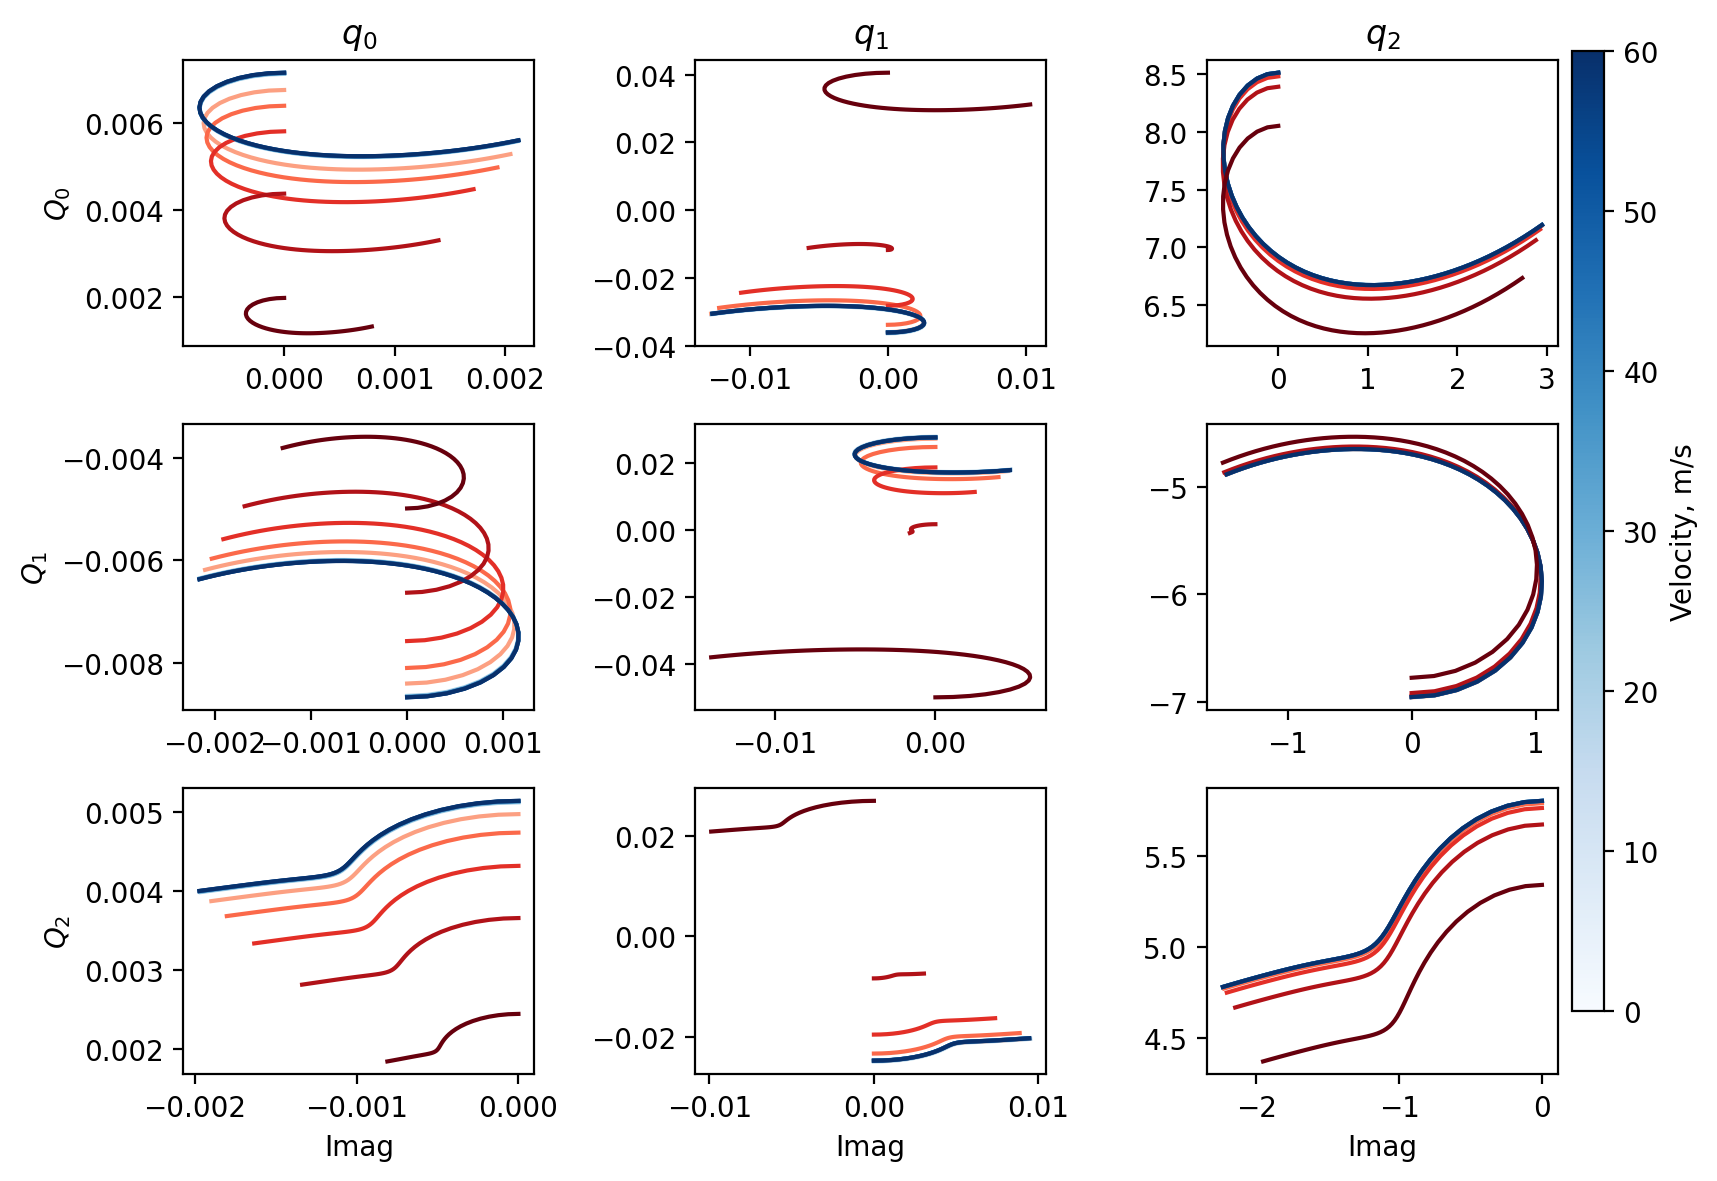

In [66]:
m_list = [0, 1, 2]
p_list = [0, 1, 2]
u_inf_vec = [20, 30, 40, 50, 60]
output_path = './output/postprocess_coarse/'
cmap=plt.get_cmap('Blues')
cmap2=plt.get_cmap('Reds')
cmap3=plt.get_cmap('Greens')

# nrm = plt.Normalize(vmin=-0.2, vmax=1)
nrm = plt.Normalize(vmin=0, vmax=60)



fig, ax = plt.subplots(nrows=len(p_list), ncols=len(m_list))

for u_inf in u_inf_vec:
    for r in range(len(p_list)):
        for c in range(len(m_list)):
            yfreq = np.loadtxt(output_path + '/sharpy_alpha0000_uinf{:04g}_aero_skin0/in{:02g}_out{:02g}.txt'.format(u_inf, m_list[c], p_list[r]))
            w_to_k = 0.05/u_inf
#             ax[r, c].scatter(yfreq[:, 2]/ u_inf ** 2, yfreq[:, 1] / u_inf ** 2, c=cmap(nrm(yfreq[:, 0] * w_to_k)), s=4)
            ax[r, c].plot(yfreq[:, 2]/ u_inf ** 2, yfreq[:, 1] / u_inf ** 2, c=cmap(nrm(u_inf)))


            
            yfreq = np.loadtxt(output_path + '/sharpy_alpha0100_uinf{:04g}_aero_skin0/in{:02g}_out{:02g}.txt'.format(u_inf, m_list[c], p_list[r]))
            w_to_k = 0.05/u_inf
#             ax[r, c].scatter(yfreq[:, 2]/ u_inf ** 2, yfreq[:, 1] / u_inf ** 2, c=cmap2(nrm(yfreq[:, 0] * w_to_k)), s=4)
            ax[r, c].plot(yfreq[:, 2]/ u_inf ** 2, yfreq[:, 1] / u_inf ** 2, c=cmap2(nrm(u_inf)))
    
                
#             yfreq = np.loadtxt(output_path + '/sharpy_alpha0500_uinf{:04g}_aero_skin0/in{:02g}_out{:02g}.txt'.format(u_inf, m_list[c], p_list[r]))
            w_to_k = 0.05/u_inf
#             ax[r, c].scatter(yfreq[:, 2]/ u_inf ** 2, yfreq[:, 1] / u_inf ** 2, c=cmap2(nrm(yfreq[:, 0] * w_to_k)), s=4)
#             ax[r, c].plot(yfreq[:, 2]/ u_inf ** 2, yfreq[:, 1] / u_inf ** 2, c=cmap3(nrm(u_inf)))


#             ax[r, c].plot(mrmfreq[:, 0], mrmfreq[:, 1], c=cmap2(nrm(u_inf)))


#             ax[r, c].plot(yfreq[:, 0], yfreq[:, 2], c=cmap2(nrm(u_inf)))
            
#             ax[r, c].set_xlim(0, 0.1)

            if c == 0:
                ax[r, c].set_ylabel('$Q_{%g}$'% p_list[r])
            if r == 0:
                ax[r, c].set_title('$q_{%g}$'% m_list[c])
            if r == 2:
                ax[r, c].set_xlabel('Imag')
    
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.99, 0.15, 0.02, 0.8])
fig.colorbar(mpl.cm.ScalarMappable(norm=nrm, cmap='Blues'), label='Velocity, m/s', cax=cbar_ax)

plt.tight_layout()

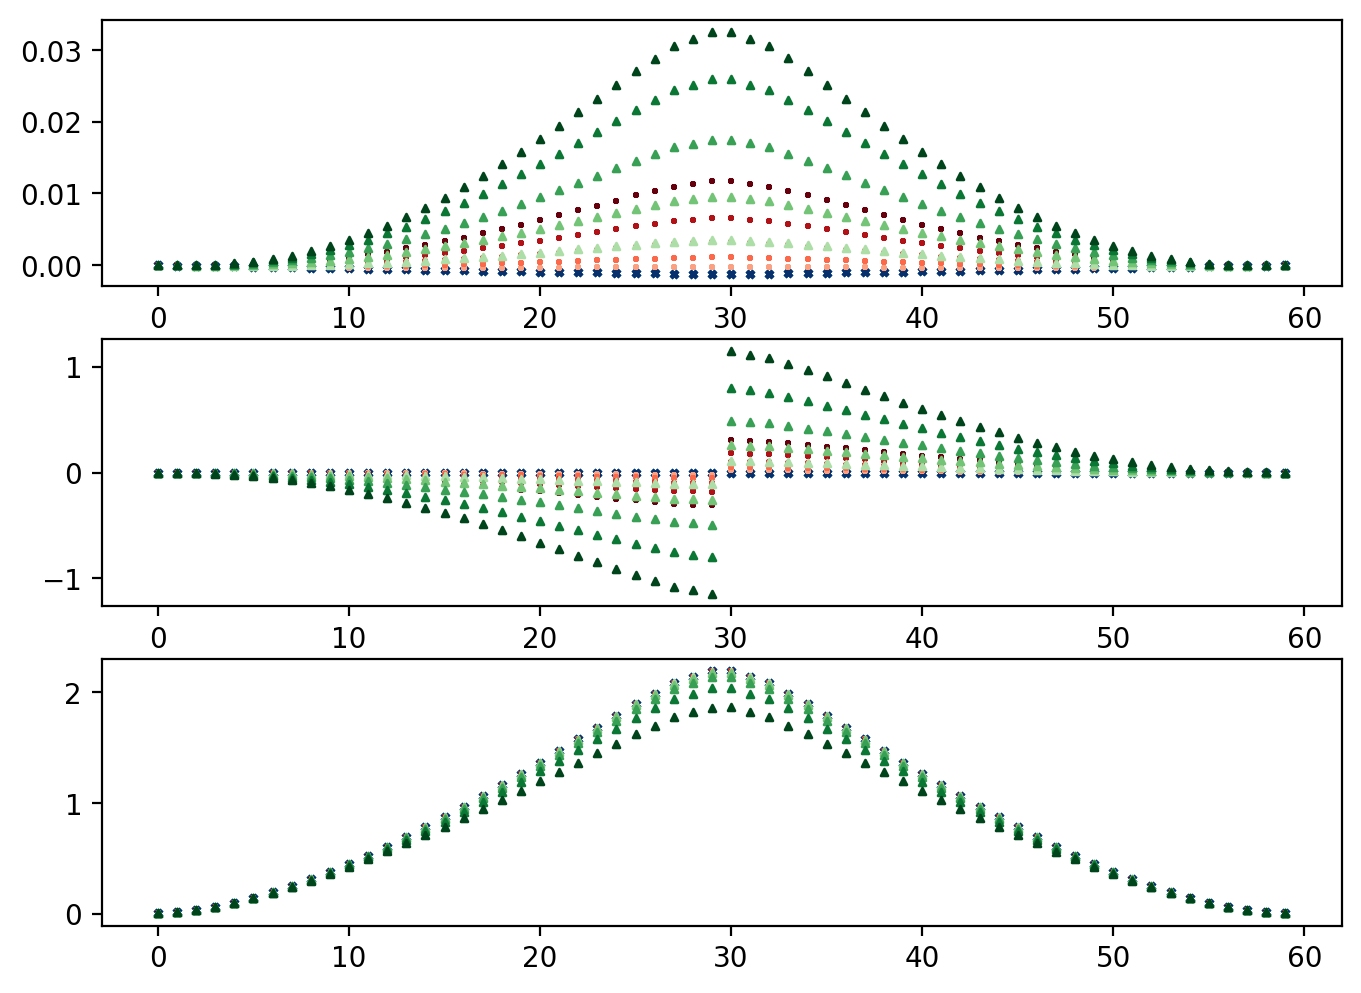

In [65]:
cmaps = [cmap, cmap2, cmap3]
markers = ['x', '+', '^']
fig, ax = plt.subplots(nrows=3)
for ith, alpha in enumerate([0, 1, 5]):
    for u_inf in np.linspace(20, 60, 5):
        phi = np.loadtxt('./output/pazy_M6N1Ms5_alpha{0:04g}_skin0/pazy_uinf{1:04g}_alpha{0:04g}/eigenvectors_r.dat'.format(alpha * 100, u_inf * 10))
        num_dof = phi.shape[0]
        for i_ax in range(3):
            phiz = np.array([phi[6 * iz + i_ax, 0] for iz in range(num_dof//6)])
            ax[i_ax].scatter(np.arange(phiz.shape[0]), phiz,
                   color=cmaps[ith](nrm(u_inf)), 
                   s=6,
                   marker=markers[ith])

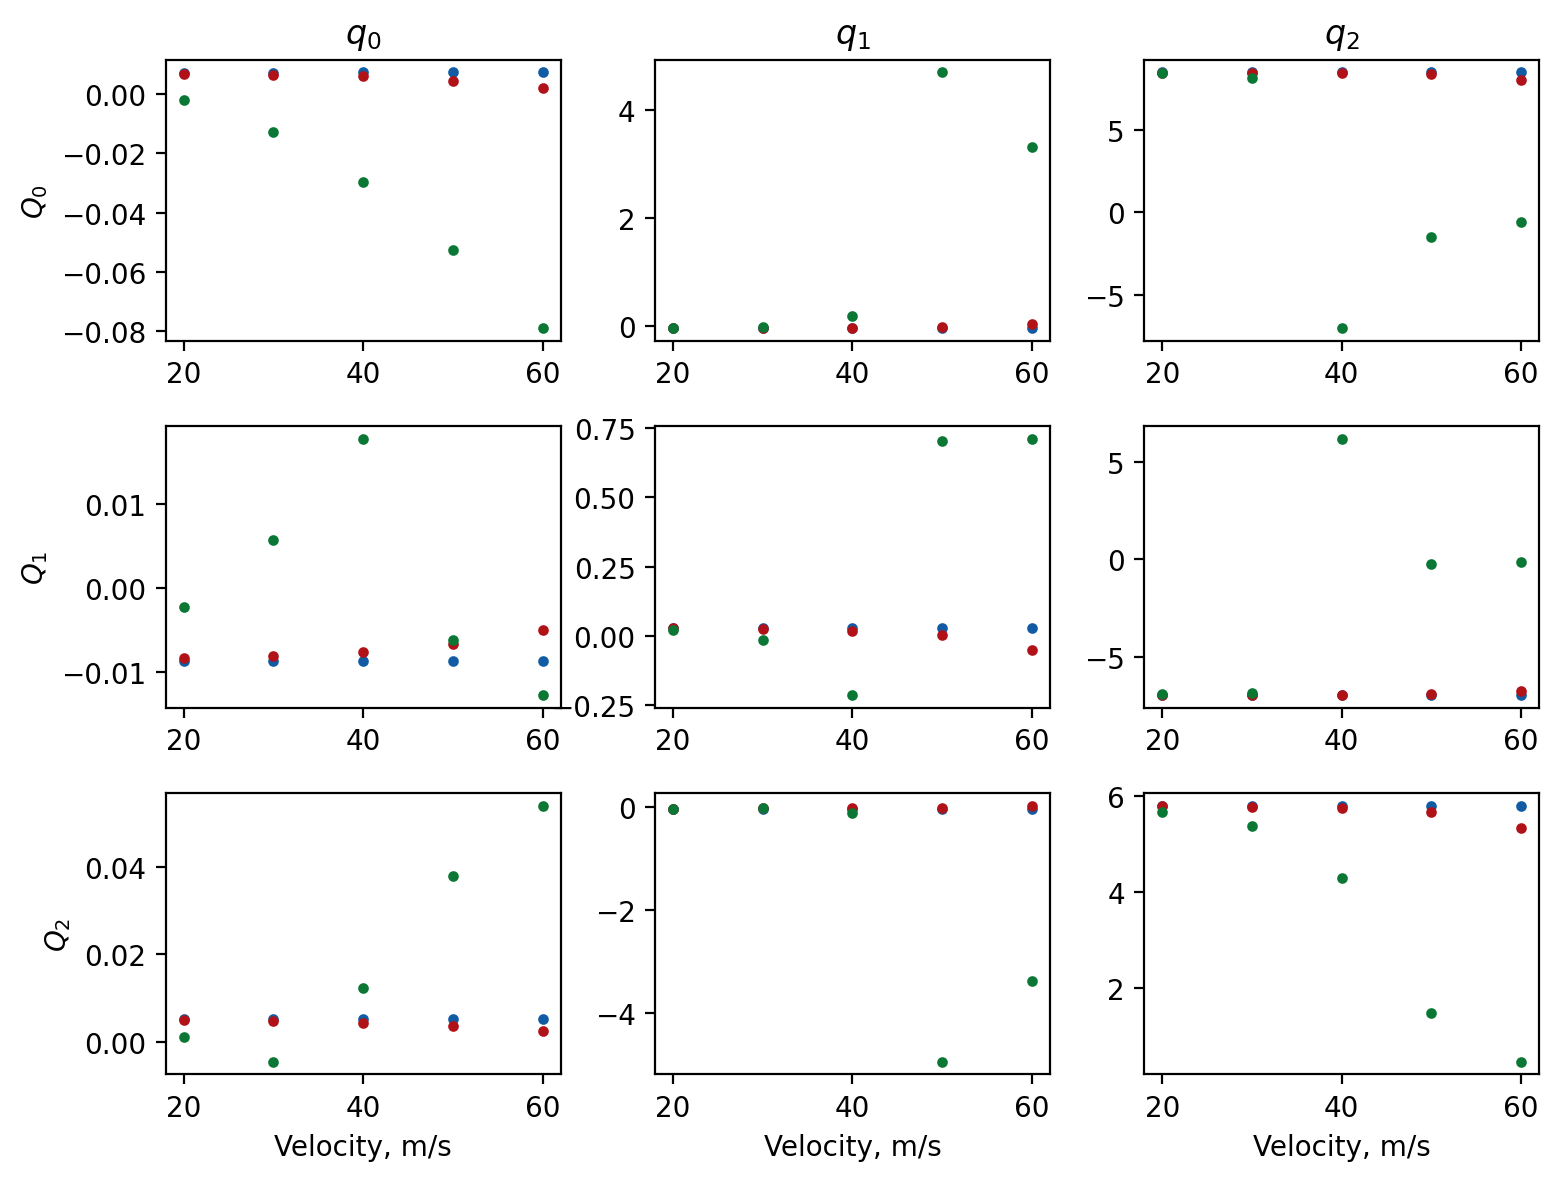

In [73]:
m_list = [0, 1, 2]
p_list = [0, 1, 2]
u_inf_vec = [20, 30, 40, 50, 60]
output_path = './output/postprocess_coarse/'
cmap=plt.get_cmap('Blues')
cmap2=plt.get_cmap('Reds')
cmap3=plt.get_cmap('Greens')

# nrm = plt.Normalize(vmin=-0.2, vmax=1)
nrm = plt.Normalize(vmin=0, vmax=60)

fig, ax = plt.subplots(nrows=len(p_list), ncols=len(m_list))

for u_inf in u_inf_vec:
    for r in range(len(p_list)):
        for c in range(len(m_list)):
            yfreq = np.loadtxt(output_path + '/sharpy_alpha0000_uinf{:04g}_aero_skin0/in{:02g}_out{:02g}.txt'.format(u_inf, m_list[c], p_list[r]))
            w_to_k = 0.05/u_inf
#             ax[r, c].scatter(yfreq[:, 2]/ u_inf ** 2, yfreq[:, 1] / u_inf ** 2, c=cmap(nrm(yfreq[:, 0] * w_to_k)), s=4)
            ax[r, c].scatter(u_inf, yfreq[0, 1] / u_inf ** 2, color=cmap(nrm(50)), s=8)


            
            yfreq = np.loadtxt(output_path + '/sharpy_alpha0100_uinf{:04g}_aero_skin0/in{:02g}_out{:02g}.txt'.format(u_inf, m_list[c], p_list[r]))
            w_to_k = 0.05/u_inf
#             ax[r, c].scatter(yfreq[:, 2]/ u_inf ** 2, yfreq[:, 1] / u_inf ** 2, c=cmap2(nrm(yfreq[:, 0] * w_to_k)), s=4)
            ax[r, c].scatter(u_inf, yfreq[0, 1] / u_inf ** 2, color=cmap2(nrm(50)), s=8)    
                
            yfreq = np.loadtxt(output_path + '/sharpy_alpha0500_uinf{:04g}_aero_skin0/in{:02g}_out{:02g}.txt'.format(u_inf, m_list[c], p_list[r]))
            w_to_k = 0.05/u_inf
            ax[r, c].scatter(u_inf, yfreq[0, 1] / u_inf ** 2, color=cmap3(nrm(50)), s=8)    



#             ax[r, c].scatter(yfreq[:, 2]/ u_inf ** 2, yfreq[:, 1] / u_inf ** 2, c=cmap2(nrm(yfreq[:, 0] * w_to_k)), s=4)
#             ax[r, c].plot(yfreq[:, 2]/ u_inf ** 2, yfreq[:, 1] / u_inf ** 2, c=cmap3(nrm(u_inf)))


#             ax[r, c].plot(mrmfreq[:, 0], mrmfreq[:, 1], c=cmap2(nrm(u_inf)))


#             ax[r, c].plot(yfreq[:, 0], yfreq[:, 2], c=cmap2(nrm(u_inf)))
            
#             ax[r, c].set_xlim(0, 0.1)

            if c == 0:
                ax[r, c].set_ylabel('$Q_{%g}$'% p_list[r])
            if r == 0:
                ax[r, c].set_title('$q_{%g}$'% m_list[c])
            if r == 2:
                ax[r, c].set_xlabel('Velocity, m/s')
    
# fig.subplots_adjust(right=0.9)
# cbar_ax = fig.add_axes([0.99, 0.15, 0.02, 0.8])
# fig.colorbar(mpl.cm.ScalarMappable(norm=nrm, cmap='Blues'), label='Velocity, m/s', cax=cbar_ax)

plt.tight_layout()

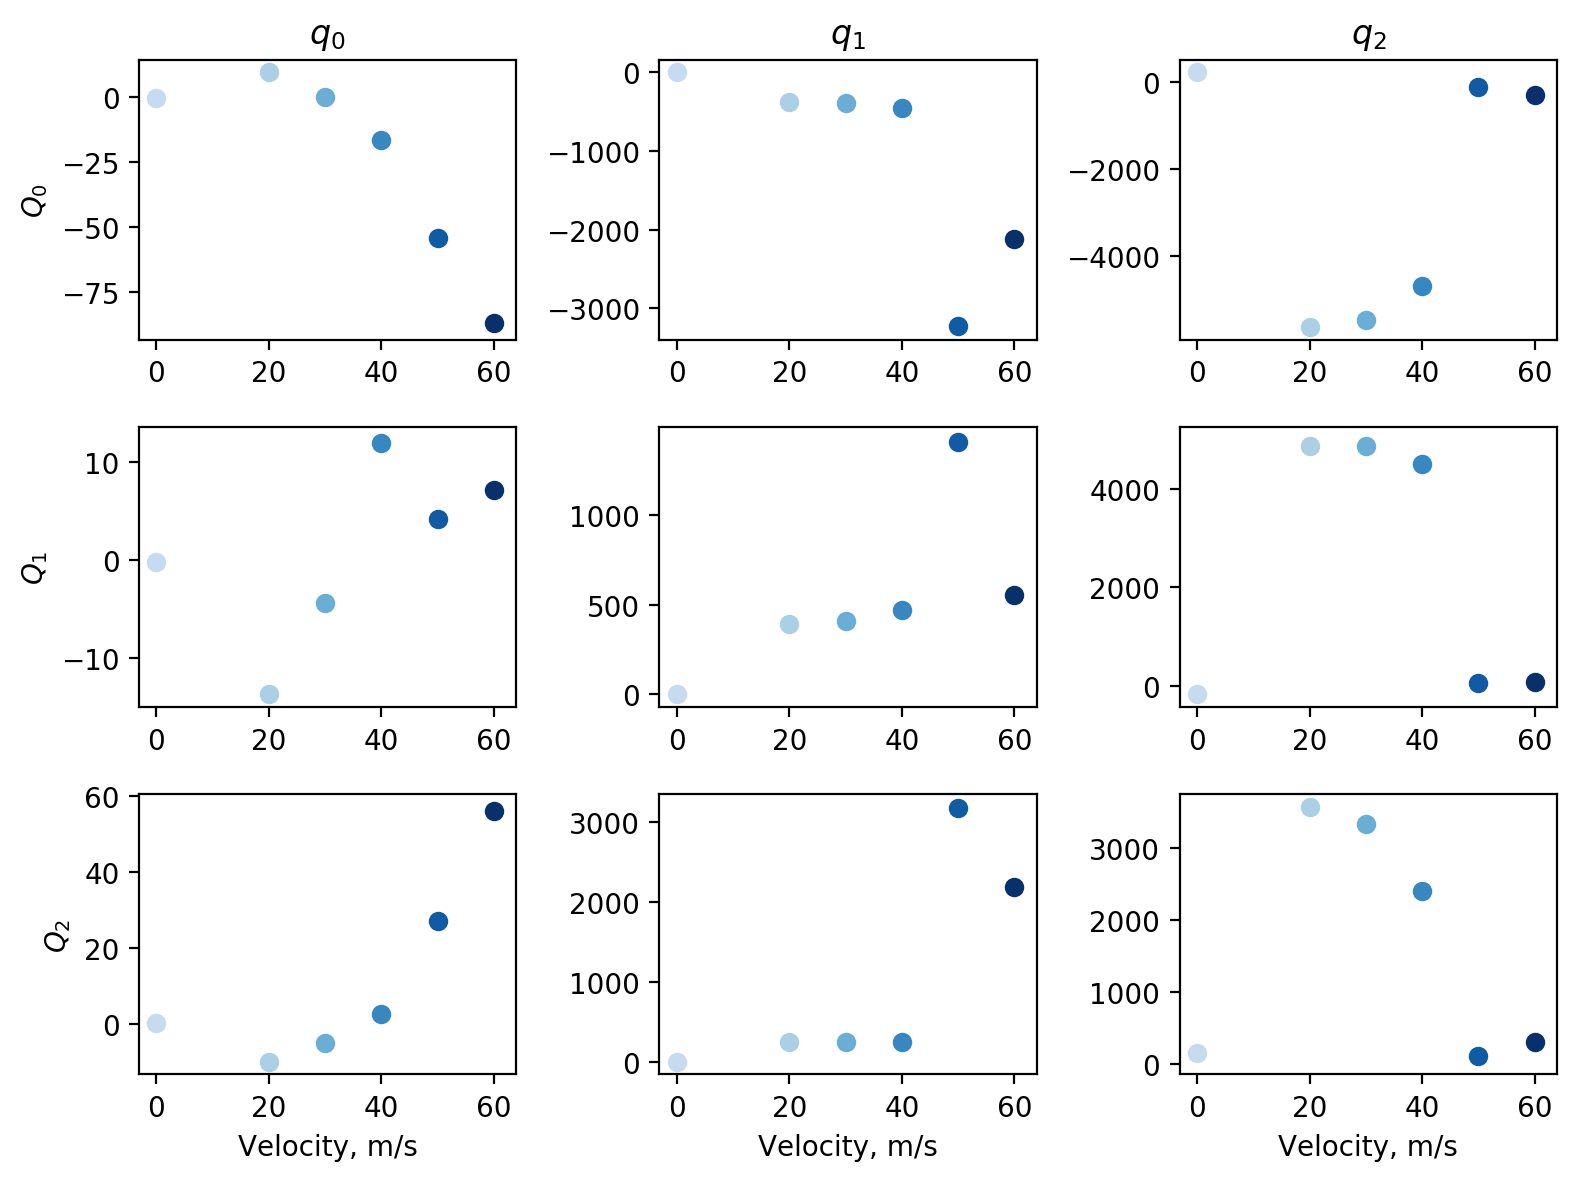

In [186]:
m_list = [0, 1, 2]
p_list = [0, 1, 2]
u_inf_vec = [20, 30, 40, 50, 60]
output_path = './output/postprocess/'
cmap=plt.get_cmap('Blues')
cmap2=plt.get_cmap('Reds')

nrm = plt.Normalize(vmin=0, vmax=60)

fig, ax = plt.subplots(nrows=len(p_list), ncols=len(m_list))

for u_inf in u_inf_vec:
    for r in range(len(p_list)):
        for c in range(len(m_list)):
            yfreq = np.loadtxt(output_path + '/sharpy_uinf{:04g}_aero_skin1/in{:02g}_out{:02g}.txt'.format(u_inf, m_list[c], p_list[r]))
            w_to_k = 0.05/u_inf
            
            if u_inf ==20:
                pass
                ax[r, c].scatter(0, uvlm['response'][p_list[r], m_list[c], 0].real, color=cmap(nrm(15)))
#             ax[r, c].plot(uvlm['frequency'], uvlm['response'][p_list[r], m_list[c], :].imag)
            ax[r, c].scatter(u_inf, yfreq[0, 1], color=cmap(nrm(u_inf)))
#             ax[r, c].plot(yfreq[:, 0], yfreq[:, 2], c=cmap2(nrm(u_inf)))
            
#             ax[r, c].set_xlim(0, 0.1)

            if c == 0:
                ax[r, c].set_ylabel('$Q_%g$'% r)
            if r == 0:
                ax[r, c].set_title('$q_%g$'% c)
            if r == 2:
                ax[r, c].set_xlabel('Velocity, m/s')
    
plt.tight_layout()

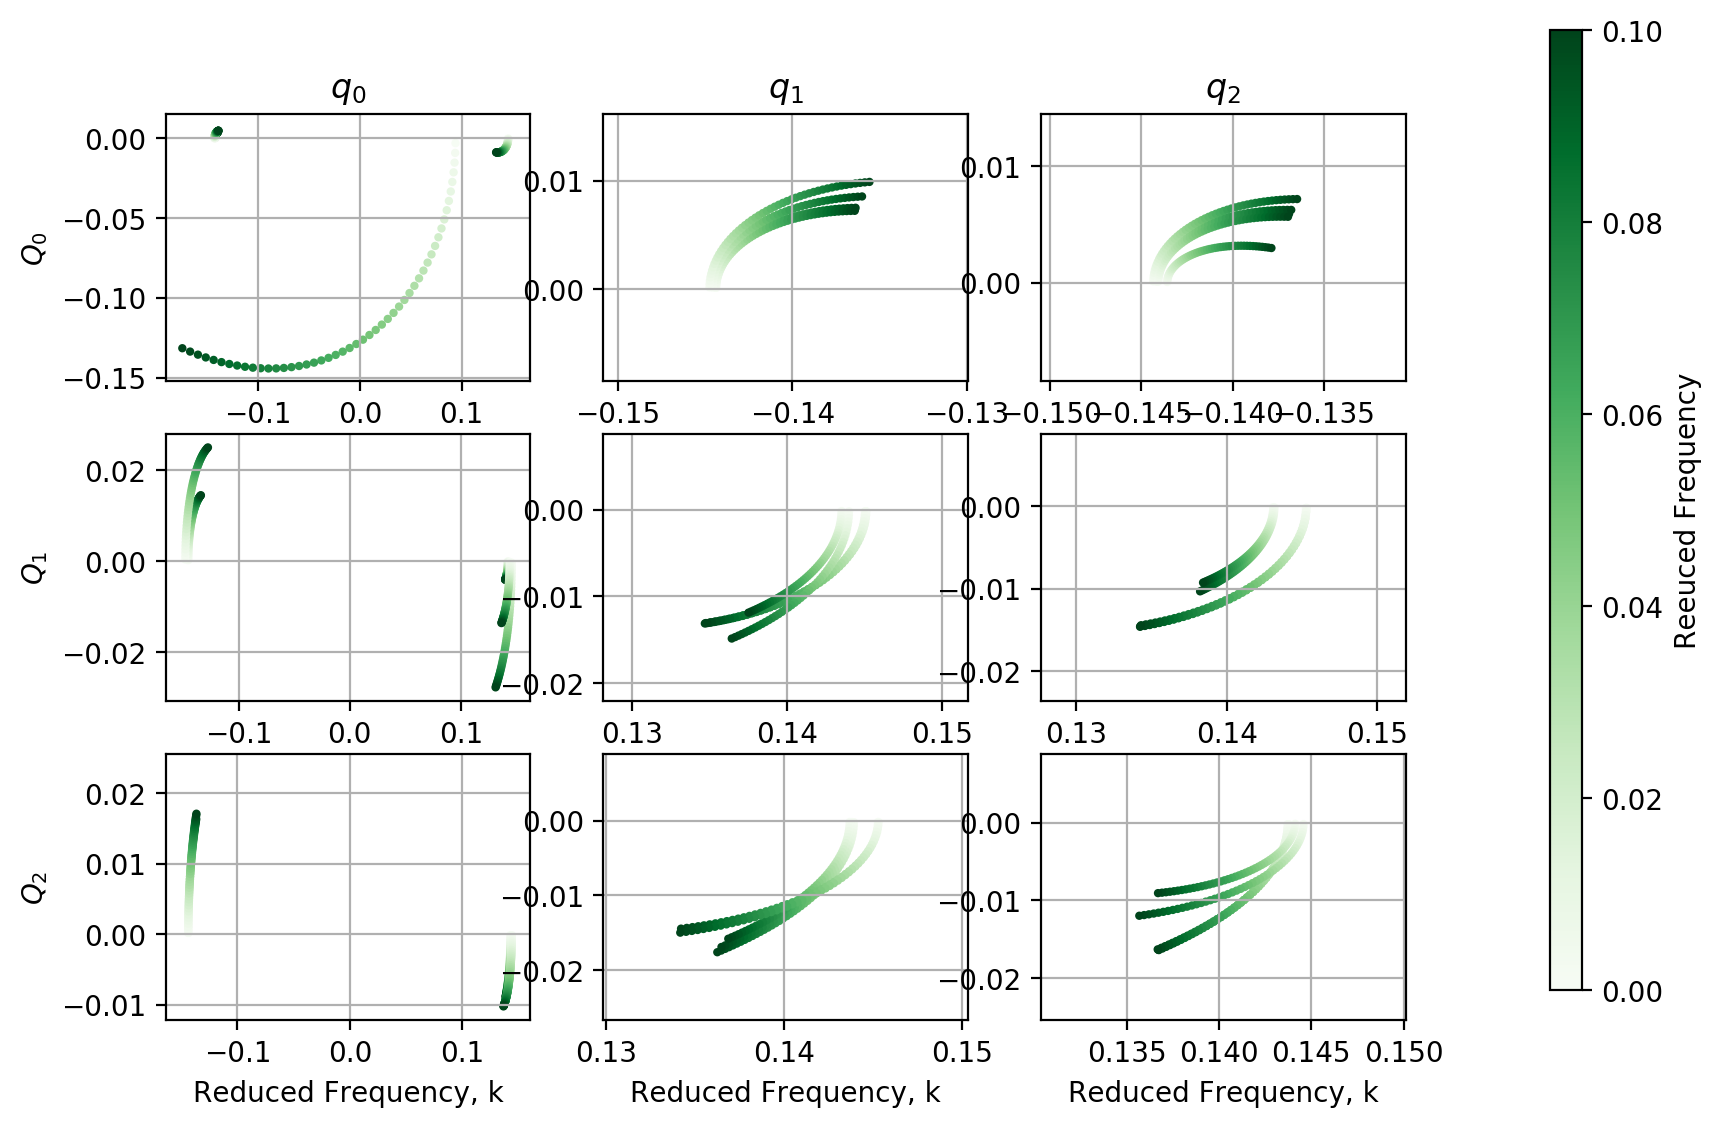

In [120]:
m_list = [0, 1, 2]
p_list = [0, 1, 2]
u_inf_vec = [20, 30, 40, 50, 60]
output_path = './output/postprocess/'
cmap=plt.get_cmap('Blues')
cmap2=plt.get_cmap('Greens')

nrmfreq = plt.Normalize(vmin=0, vmax=0.1)

fig, ax = plt.subplots(nrows=len(p_list), ncols=len(m_list))

for u_inf in u_inf_vec:
    for r in range(len(p_list)):
        for c in range(len(m_list)):
            yfreq = np.loadtxt(output_path + '/sharpy_uinf{:04g}_aero/in{:02g}_out{:02g}.txt'.format(u_inf, m_list[c], p_list[r]))
            w_to_k = 0.05/u_inf
            
#             if u_inf ==20:
#                 pass
#                 ax[r, c].plot(uvlm['frequency'][:3], uvlm['response'][p_list[r], m_list[c], :3].imag, c=cmap2(nrm(5)))
#             ax[r, c].plot(uvlm['frequency'], uvlm['response'][p_list[r], m_list[c], :].imag)
#             ax[r, c].plot(yfreq[:, 0], yfreq[:, 1], c=cmap(nrm(u_inf)))
            ax[r, c].scatter(yfreq[:, 1] / np.linalg.norm(yfreq[:, 1] + 1j * yfreq[:, 2]),
                             yfreq[:, 2] / np.linalg.norm(yfreq[:, 1] + 1j * yfreq[:, 2]), c=cmap2(nrmfreq(yfreq[:, 0])), s=4)
            
            ax[r, c].grid()

            if c == 0:
                ax[r, c].set_ylabel('$Q_%g$'% r)
            if r == 0:
                ax[r, c].set_title('$q_%g$'% c)
            if r == 2:
                ax[r, c].set_xlabel('Reduced Frequency, k')
    
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.99, 0.15, 0.02, 0.8])
fig.colorbar(mpl.cm.ScalarMappable(norm=nrmfreq, cmap='Greens'), label='Reeuced Frequency', cax=cbar_ax)

# plt.tight_layout()

# Unscaled Plot

In [286]:
path_to_freqresp = './output/test_single_pazy_M16N1Ms16_alpha0000_skin0/pazy_uinf0100_alpha0000/frequencyresponse/aerodynamic.freqresp.h5'
with h5py.File(path_to_freqresp, 'r') as f:
    uvlm = h5utils.load_h5_in_dict(f)

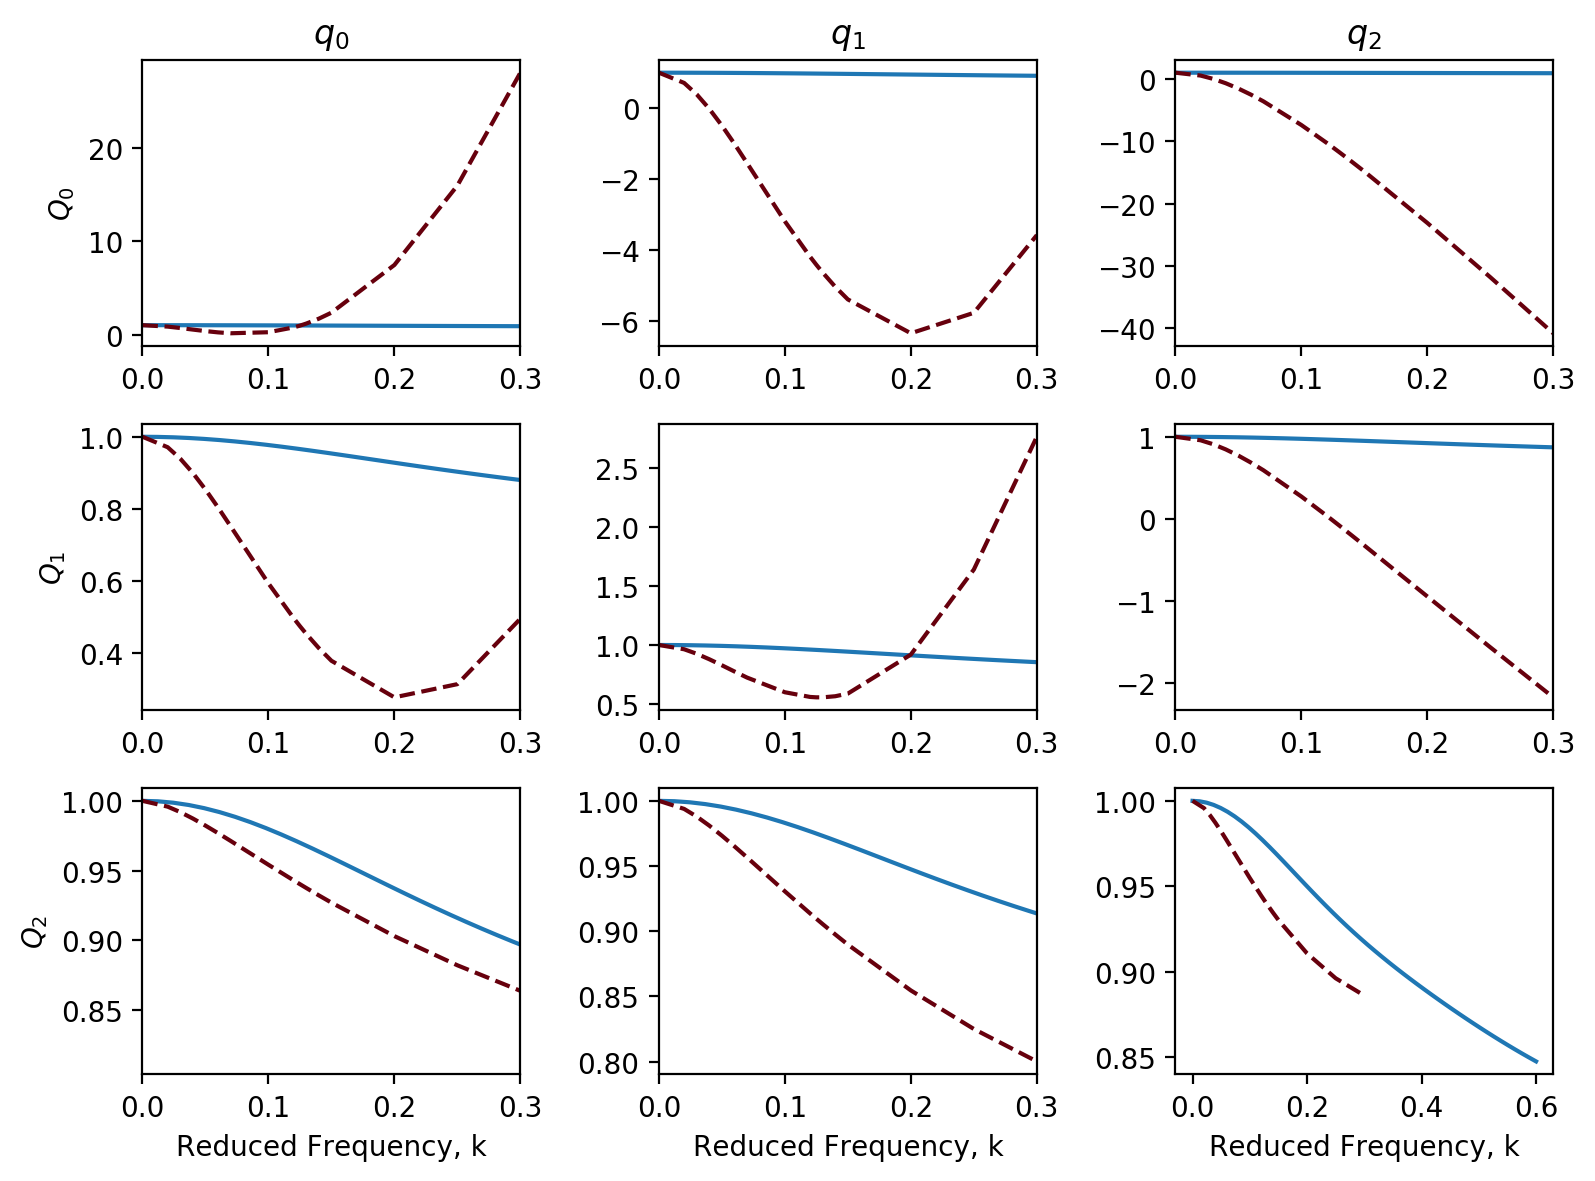

In [282]:
m_list = [0, 1, 2]
p_list = [0, 1, 2]

fig, ax = plt.subplots(nrows=len(p_list), ncols=len(m_list))

u_inf = 0
for r in range(len(p_list)):
    for c in range(len(m_list)):
        ax[r, c].plot(uvlm['frequency'] * 0.1/10, uvlm['response'][p_list[r], m_list[c], :].real / uvlm['response'][p_list[r], m_list[c], 0].real)
#         ax[r, c].plot(uvlm['frequency'] * 0.05/50, uvlm['response'][p_list[r], m_list[c], :].imag / np.max(np.abs(uvlm['response'][p_list[r], m_list[c], :].imag)))
        
        if r <= 2 and c <= 2:
            mrmfreq = np.loadtxt(output_path + '/mrm_umbeam_wo_skin_qhh_uinf{:04g}_alpha0500/in{:02g}_out{:02g}.txt'.format(u_inf * 10, m_list[c], p_list[r]))

            ax[r, c].plot(mrmfreq[mrmfreq[:, 0]<=0.3, 0], mrmfreq[mrmfreq[:, 0]<=0.3, 1] / mrmfreq[0, 1], c=cmap2(nrm(u_inf*0+100)), ls='--')
#         ax[r, c].plot(mrmfreq[:, 0], mrmfreq[:, 1] / mrmfreq[0, 1], c=cmap2(nrm(u_inf*0+100)), ls='--')


        ax[r, c].set_xlim(0, 0.3)
        
        if c == 0:
            ax[r, c].set_ylabel('$Q_%g$'% r)
        if r == 0:
            ax[r, c].set_title('$q_%g$'% c)
        if r == 2:
            ax[r, c].set_xlabel('Reduced Frequency, k')
    
plt.tight_layout()
plt.autoscale()

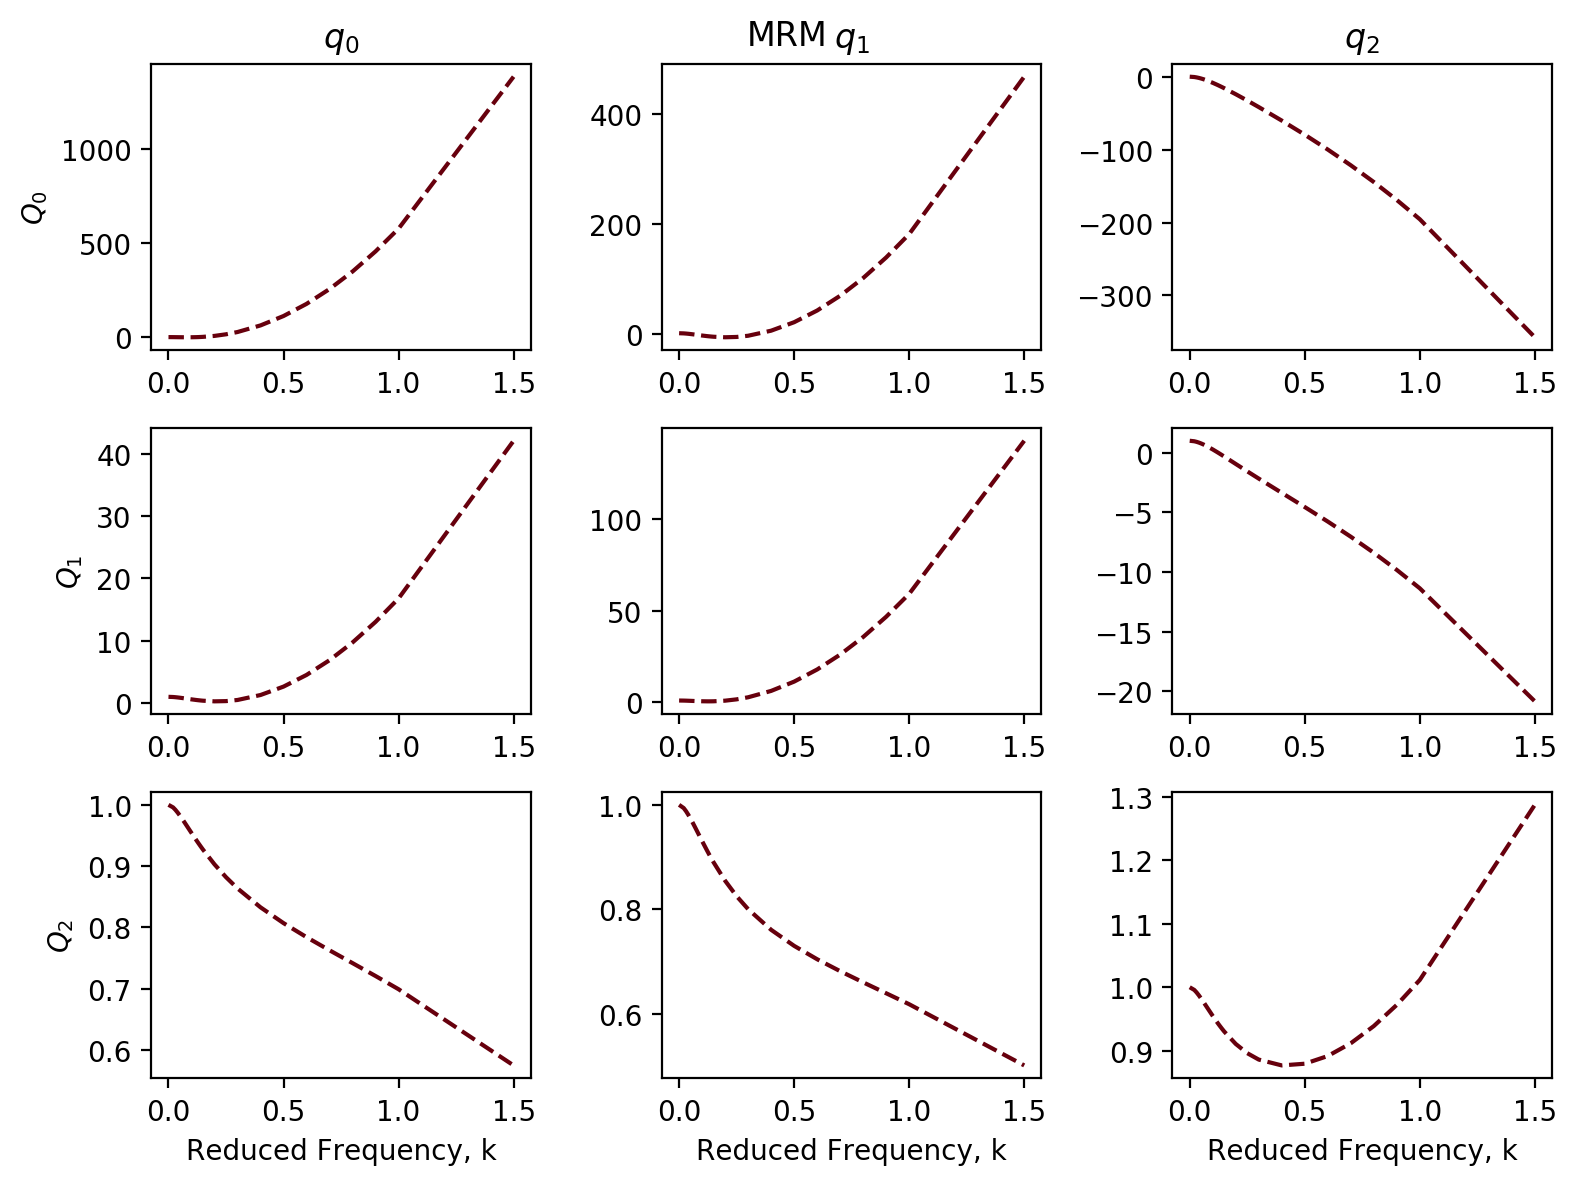

In [283]:
m_list = [0, 1, 2]
p_list = [0, 1, 2]

fig, ax = plt.subplots(nrows=len(p_list), ncols=len(m_list))

u_inf = 0
for r in range(len(p_list)):
    for c in range(len(m_list)):
#         ax[r, c].plot(uvlm['frequency'] * 0.05/10, uvlm['response'][p_list[r], m_list[c], :].real / uvlm['response'][p_list[r], m_list[c], 0].real)
#         ax[r, c].plot(uvlm['frequency'] * 0.05/50, uvlm['response'][p_list[r], m_list[c], :].imag / np.max(np.abs(uvlm['response'][p_list[r], m_list[c], :].imag)))
        
        
        mrmfreq = np.loadtxt(output_path + '/mrm_umbeam_wo_skin_refined_uinf{:04g}_alpha0500/in{:02g}_out{:02g}.txt'.format(u_inf * 10, m_list[c], p_list[r]))

#         ax[r, c].plot(mrmfreq[mrmfreq[:, 0]<=0.3, 0], mrmfreq[mrmfreq[:, 0]<=0.3, 1] / mrmfreq[0, 1], c=cmap2(nrm(u_inf*0+100)), ls='--')
        ax[r, c].plot(mrmfreq[:, 0], mrmfreq[:, 1] / mrmfreq[0, 1], c=cmap2(nrm(u_inf*0+100)), ls='--')


#         ax[r, c].set_xlim(0, 0.3)
        
        if c == 0:
            ax[r, c].set_ylabel('$Q_%g$'% r)
        if r == 0:
            ax[r, c].set_title('$q_%g$'% c)
        if r == 2:
            ax[r, c].set_xlabel('Reduced Frequency, k')
    
plt.autoscale()
plt.suptitle('MRM')
plt.tight_layout()

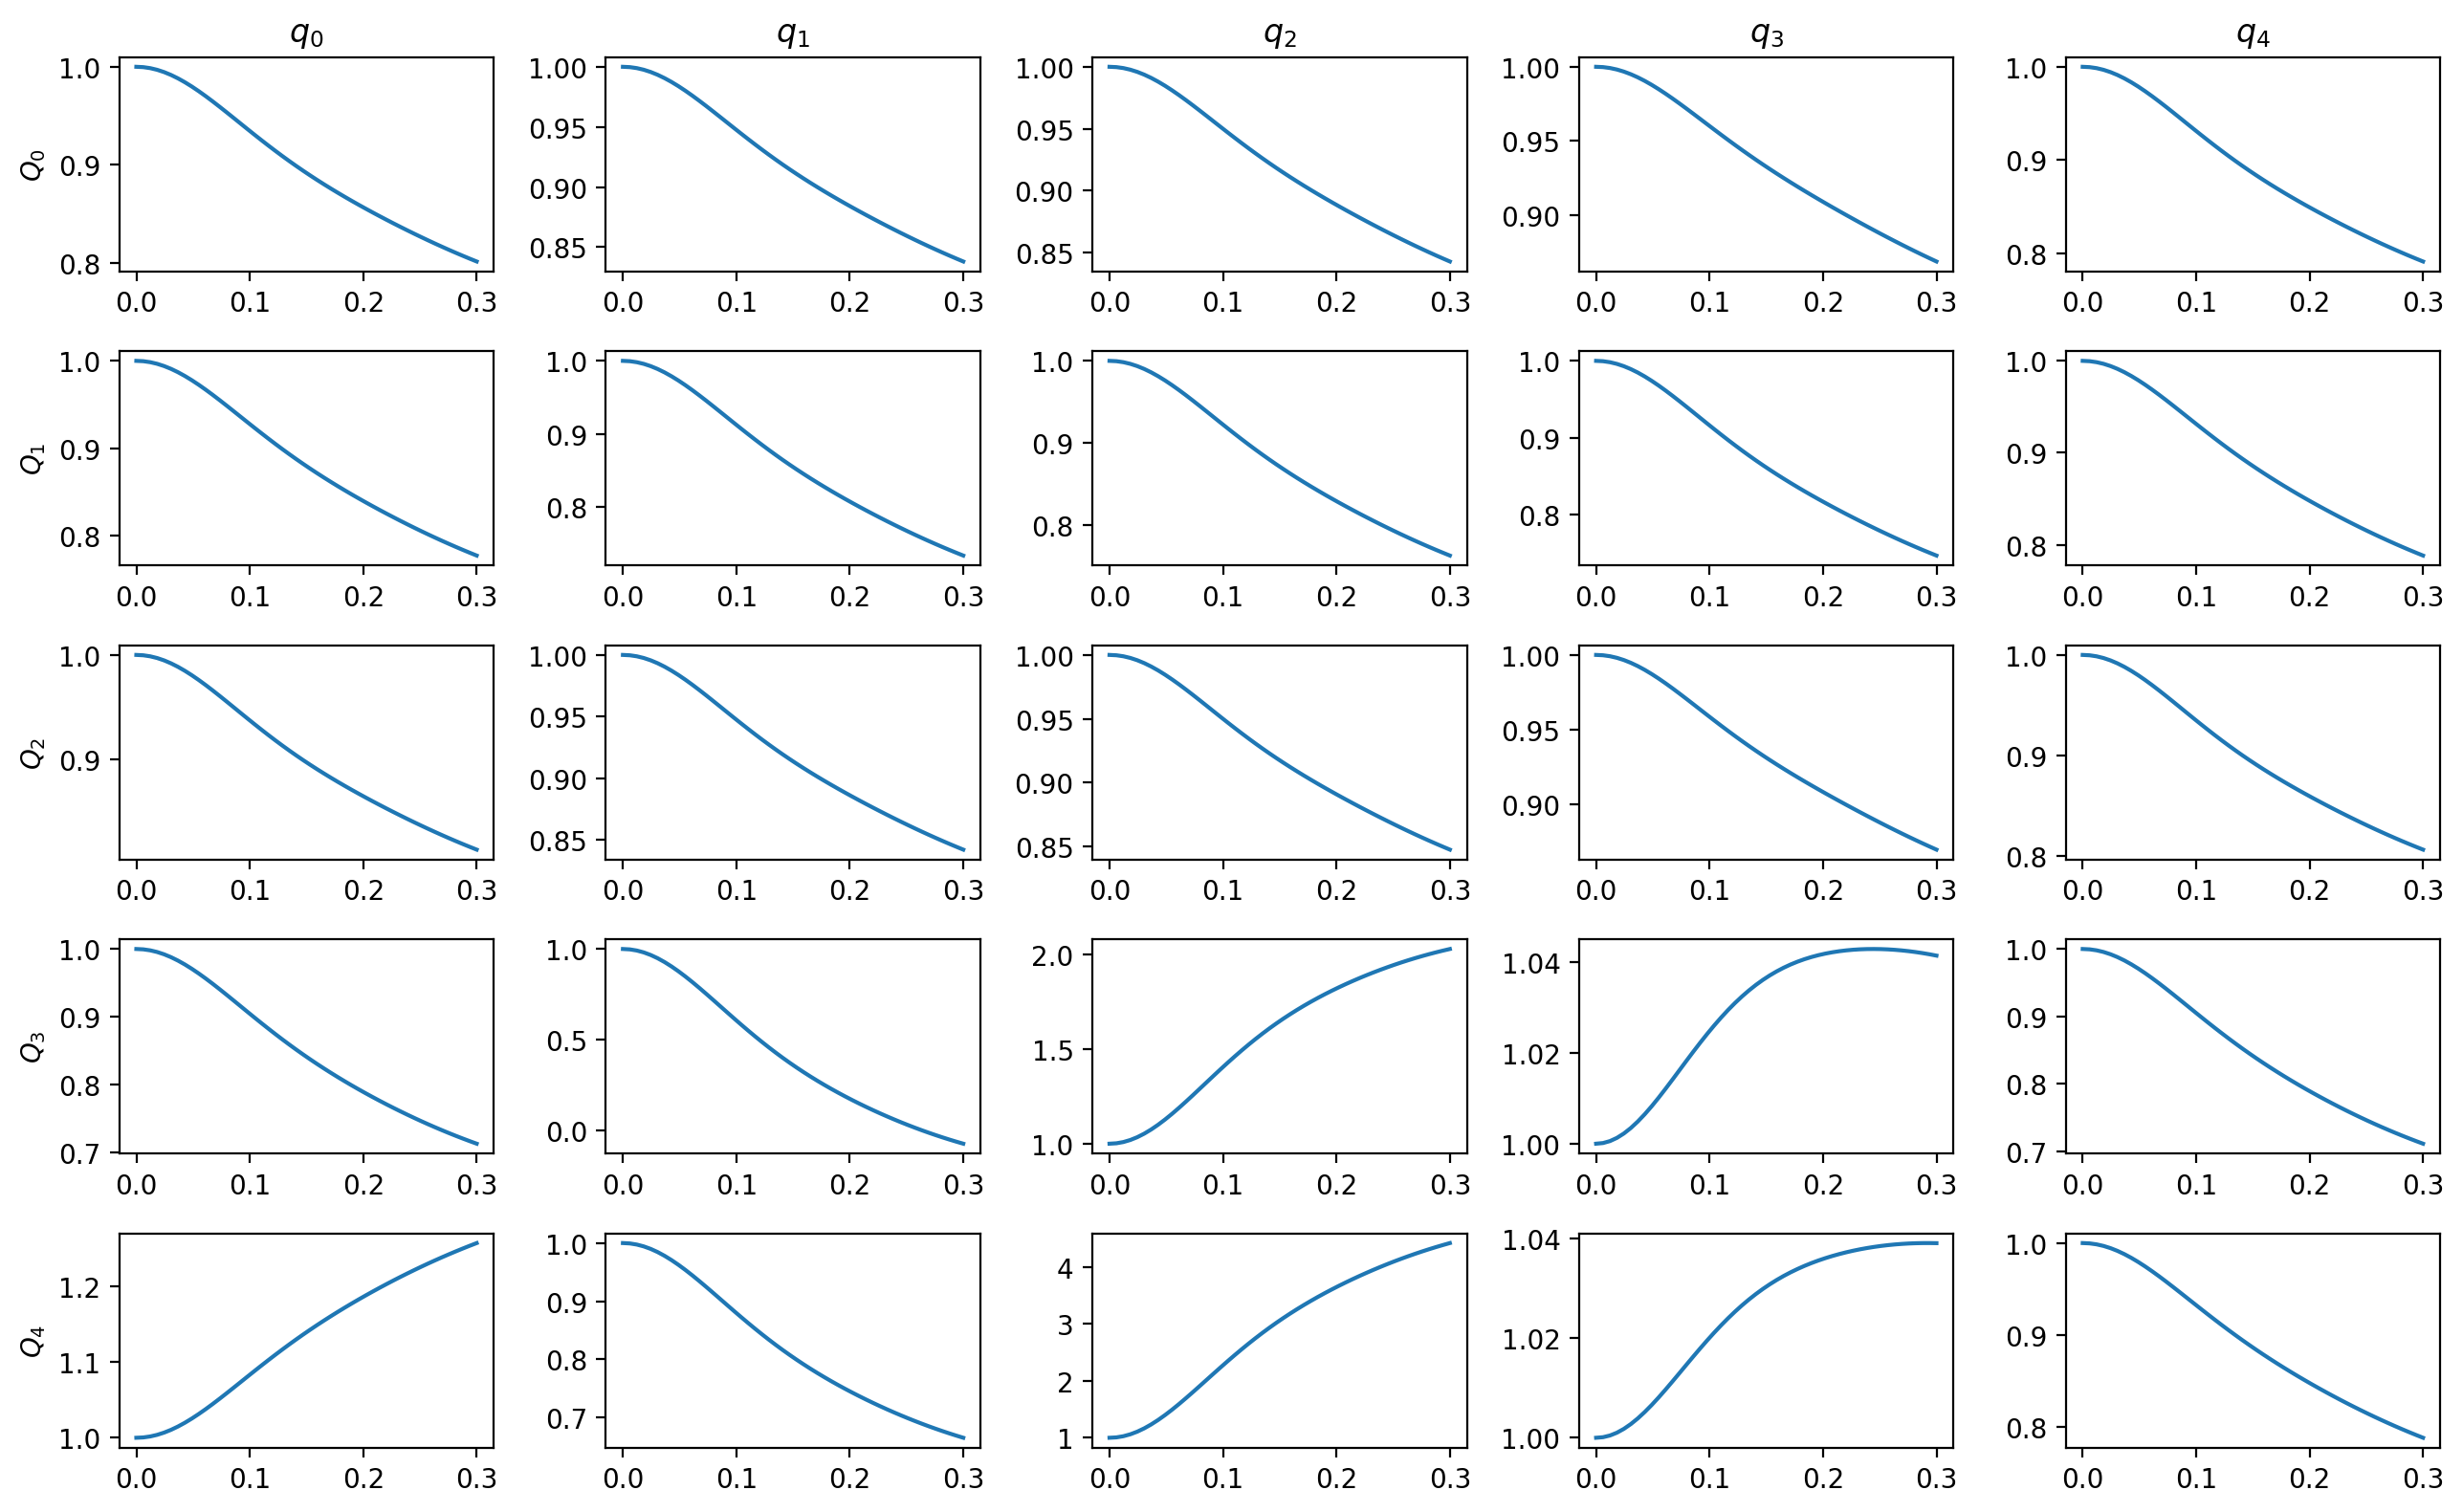

In [297]:
m_list = [0, 1, 2, 3, 4]
p_list = [0, 1, 2, 3, 4]

fig, ax = plt.subplots(nrows=len(p_list), ncols=len(m_list), figsize=(13, 8))

u_inf = 0
for r in range(len(p_list)):
    for c in range(len(m_list)):
        ax[r, c].plot(uvlm['frequency'] * 0.05/10, uvlm['response'][p_list[r], m_list[c], :].real / uvlm['response'][p_list[r], m_list[c], 0].real)
#         ax[r, c].plot(uvlm['frequency'] * 0.05/50, uvlm['response'][p_list[r], m_list[c], :].imag / np.max(np.abs(uvlm['response'][p_list[r], m_list[c], :].imag)))
        
#         if r <= 2 and c <= 2:
#             mrmfreq = np.loadtxt(output_path + '/mrm_umbeam_wo_skin_qhh_uinf{:04g}_alpha0500/in{:02g}_out{:02g}.txt'.format(u_inf * 10, m_list[c], p_list[r]))

#             ax[r, c].plot(mrmfreq[mrmfreq[:, 0]<=0.3, 0], mrmfreq[mrmfreq[:, 0]<=0.3, 1] / mrmfreq[0, 1], c=cmap2(nrm(u_inf*0+100)), ls='--')
#         ax[r, c].plot(mrmfreq[:, 0], mrmfreq[:, 1] / mrmfreq[0, 1], c=cmap2(nrm(u_inf*0+100)), ls='--')


#         ax[r, c].set_xlim(0, 0.3)
        
        if c == 0:
            ax[r, c].set_ylabel('$Q_%g$'% r)
        if r == 0:
            ax[r, c].set_title('$q_%g$'% c)
        if r == 4:
#             ax[r, c].set_xlabel('Reduced Frequency, k')
            pass
    
# plt.autoscale()
# plt.suptitle('SHARPy - not scaled - undeformed - resolved to k=0.3')
plt.tight_layout()

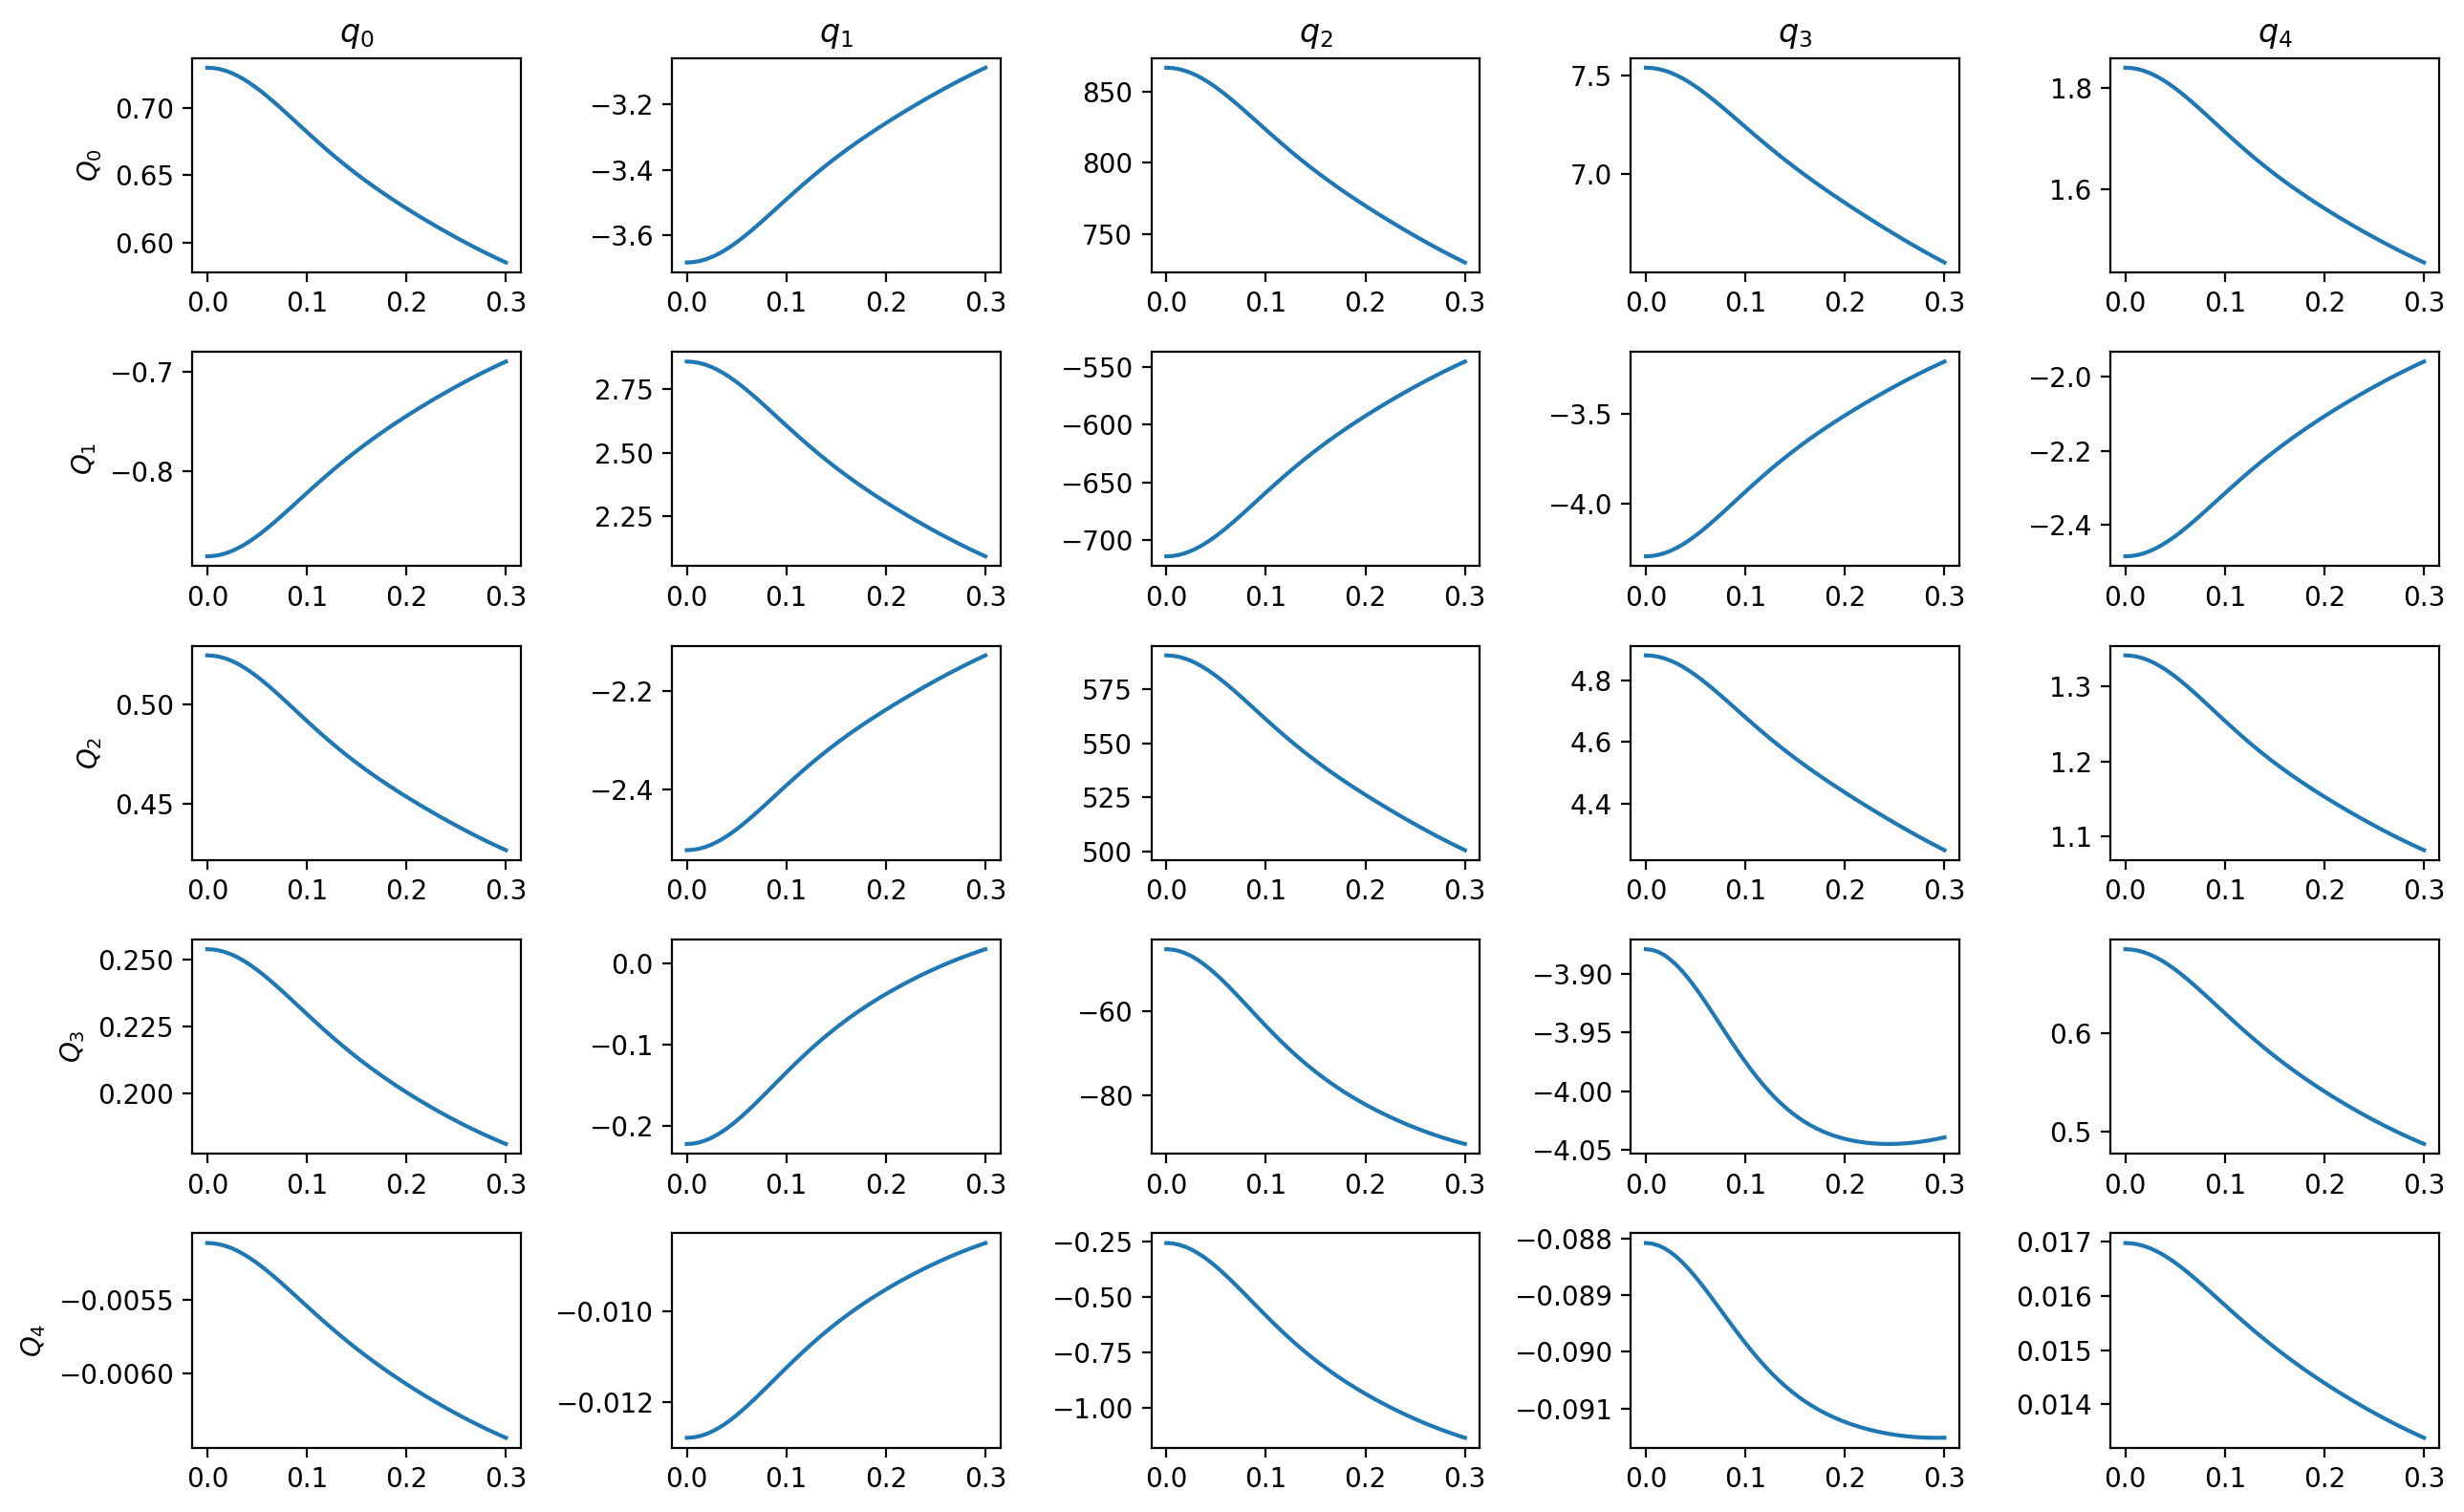

In [298]:
m_list = [0, 1, 2, 3, 4]
p_list = [0, 1, 2, 3, 4]

fig, ax = plt.subplots(nrows=len(p_list), ncols=len(m_list), figsize=(13, 8))

u_inf = 0
for r in range(len(p_list)):
    for c in range(len(m_list)):
        ax[r, c].plot(uvlm['frequency'] * 0.05/10, uvlm['response'][p_list[r], m_list[c], :].real)
#         ax[r, c].plot(uvlm['frequency'] * 0.05/50, uvlm['response'][p_list[r], m_list[c], :].imag / np.max(np.abs(uvlm['response'][p_list[r], m_list[c], :].imag)))
        
#         if r <= 2 and c <= 2:
#             mrmfreq = np.loadtxt(output_path + '/mrm_umbeam_wo_skin_qhh_uinf{:04g}_alpha0500/in{:02g}_out{:02g}.txt'.format(u_inf * 10, m_list[c], p_list[r]))

#             ax[r, c].plot(mrmfreq[mrmfreq[:, 0]<=0.3, 0], mrmfreq[mrmfreq[:, 0]<=0.3, 1] / mrmfreq[0, 1], c=cmap2(nrm(u_inf*0+100)), ls='--')
#         ax[r, c].plot(mrmfreq[:, 0], mrmfreq[:, 1] / mrmfreq[0, 1], c=cmap2(nrm(u_inf*0+100)), ls='--')


#         ax[r, c].set_xlim(0, 0.3)
        
        if c == 0:
            ax[r, c].set_ylabel('$Q_%g$'% r)
        if r == 0:
            ax[r, c].set_title('$q_%g$'% c)
        if r == 4:
#             ax[r, c].set_xlabel('Reduced Frequency, k')
            pass
    
# plt.autoscale()
# plt.suptitle('SHARPy - not scaled - undeformed - resolved to k=0.3')
plt.tight_layout()

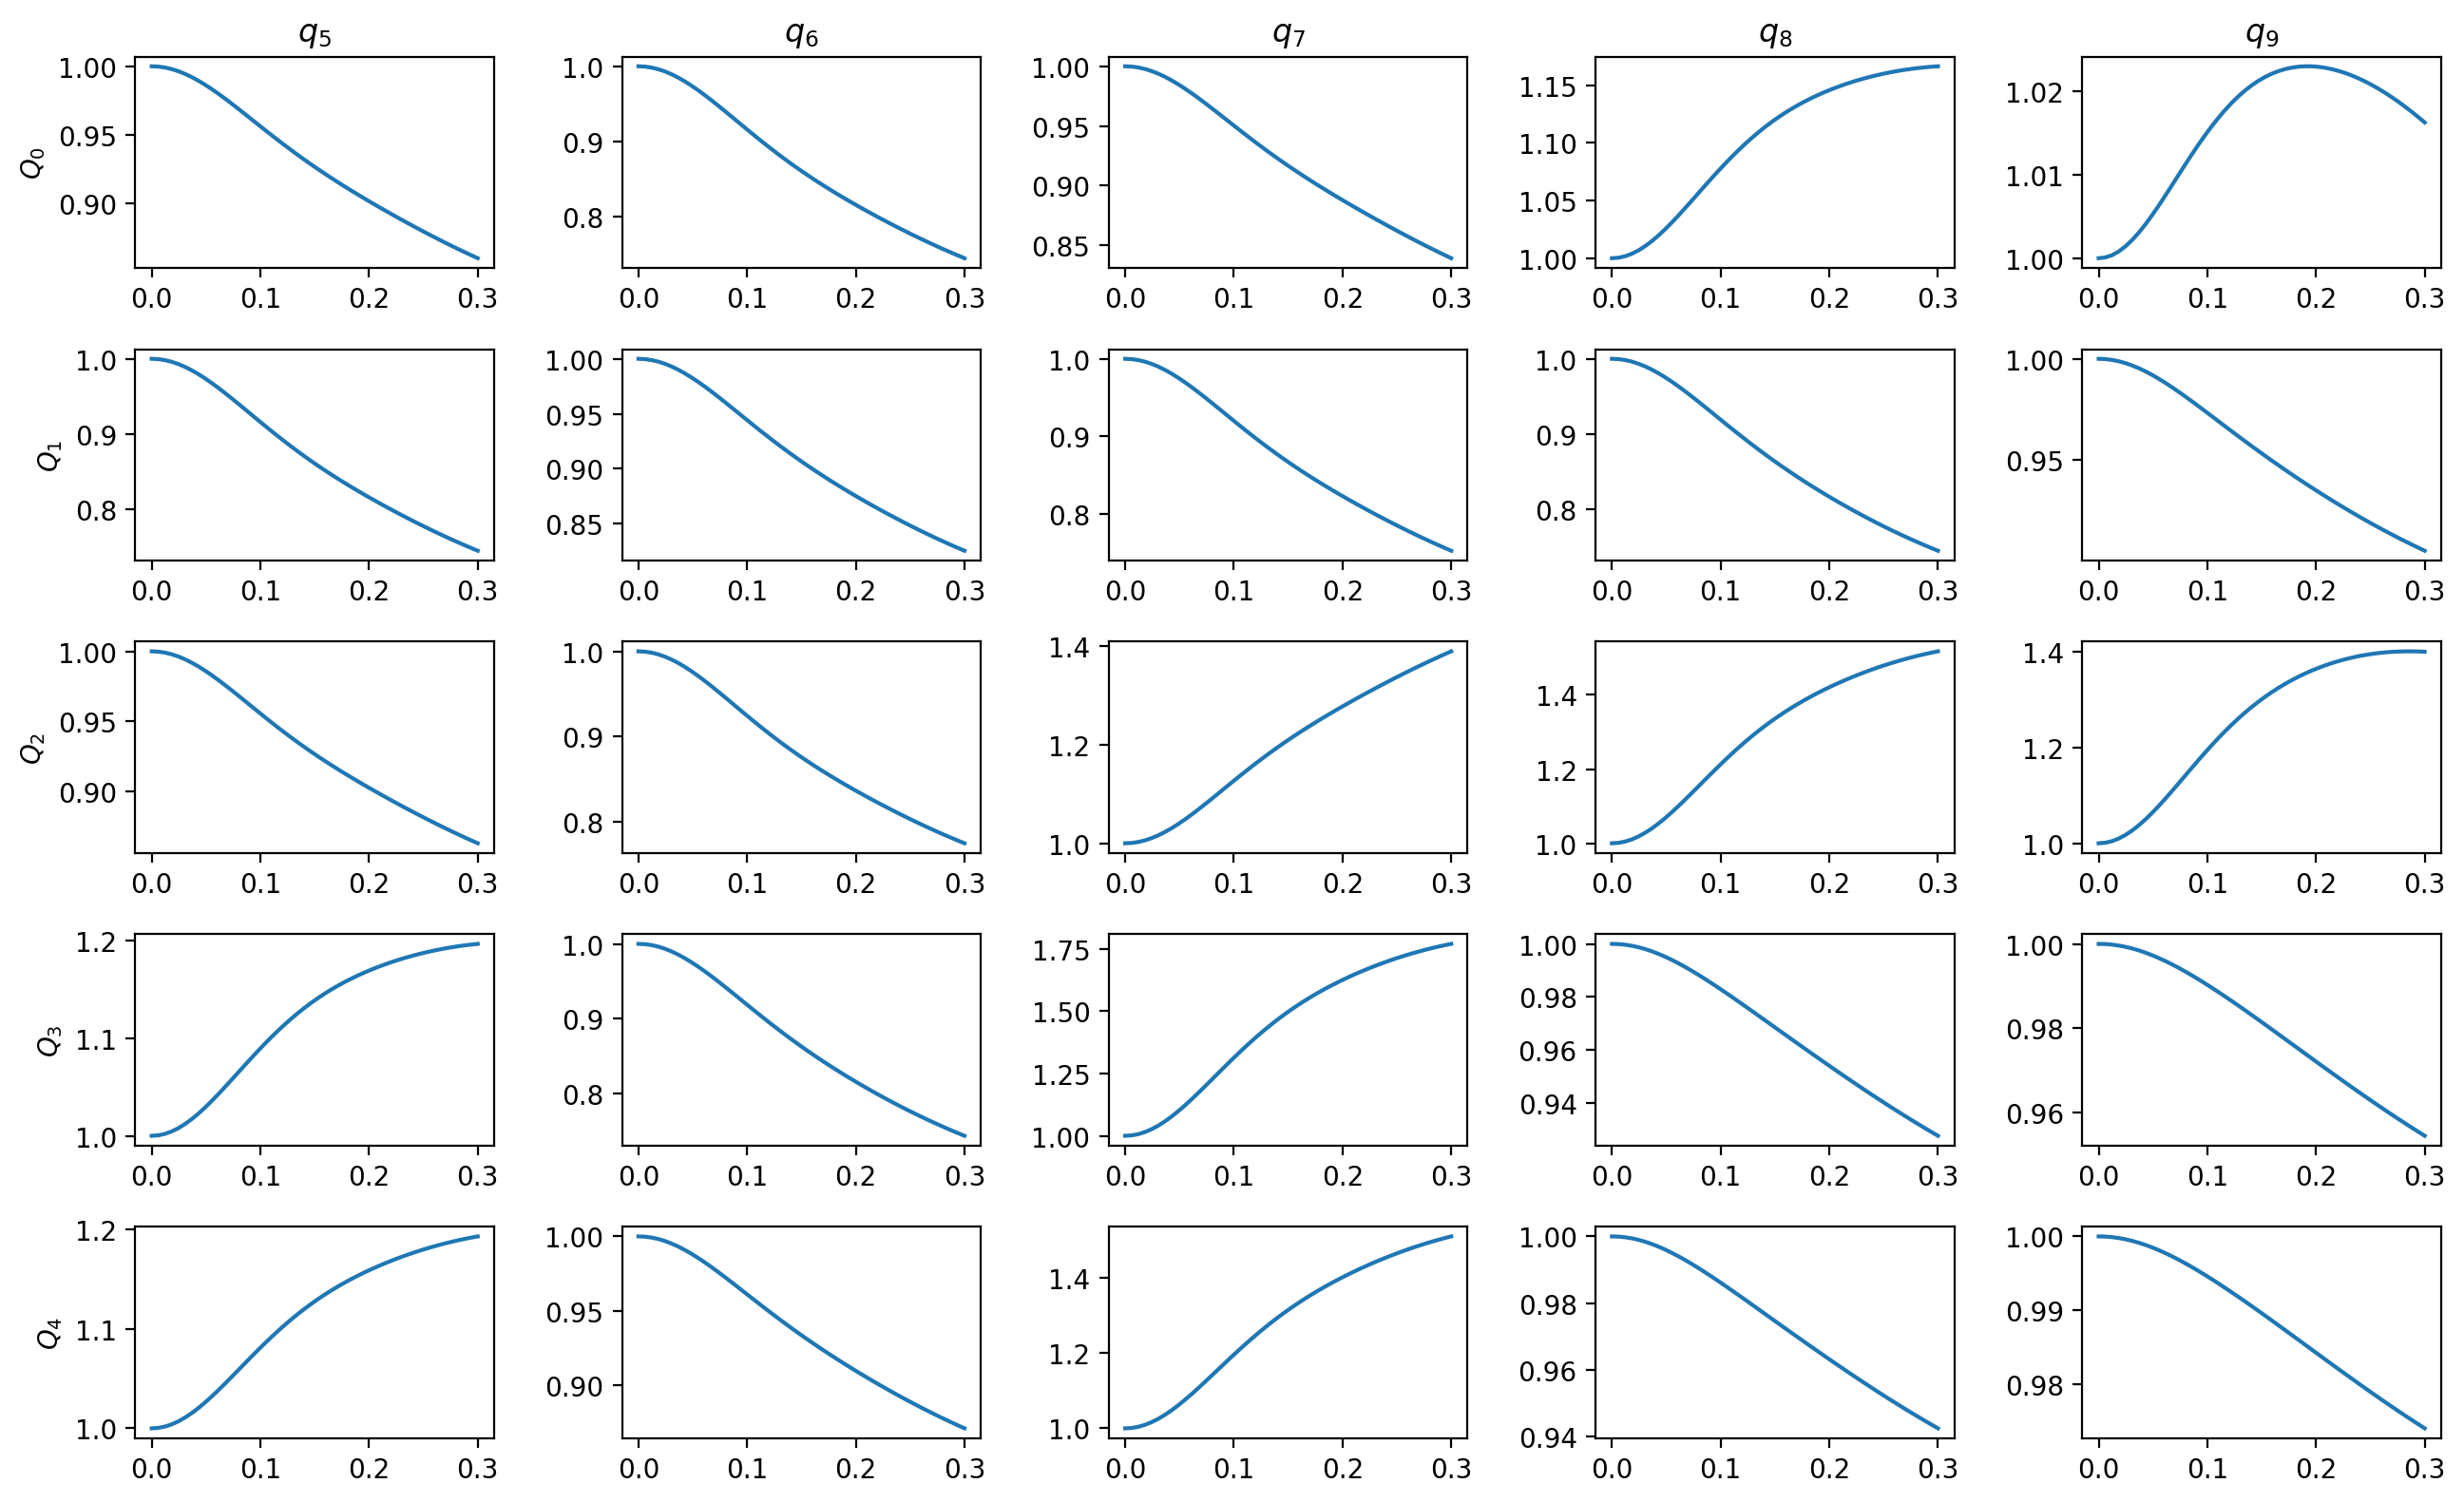

In [296]:
m_list = [5, 6, 7, 8, 9]
p_list = [0, 1, 2, 3, 4]

fig, ax = plt.subplots(nrows=len(p_list), ncols=len(m_list), figsize=(13, 8))

u_inf = 0
for r in range(len(p_list)):
    for c in range(len(m_list)):
        ax[r, c].plot(uvlm['frequency'] * 0.05/10, uvlm['response'][p_list[r], m_list[c], :].real / uvlm['response'][p_list[r], m_list[c], 0].real)
#         ax[r, c].plot(uvlm['frequency'] * 0.05/50, uvlm['response'][p_list[r], m_list[c], :].imag / np.max(np.abs(uvlm['response'][p_list[r], m_list[c], :].imag)))
        
#         if r <= 2 and c <= 2:
#             mrmfreq = np.loadtxt(output_path + '/mrm_umbeam_wo_skin_qhh_uinf{:04g}_alpha0500/in{:02g}_out{:02g}.txt'.format(u_inf * 10, m_list[c], p_list[r]))

#             ax[r, c].plot(mrmfreq[mrmfreq[:, 0]<=0.3, 0], mrmfreq[mrmfreq[:, 0]<=0.3, 1] / mrmfreq[0, 1], c=cmap2(nrm(u_inf*0+100)), ls='--')
#         ax[r, c].plot(mrmfreq[:, 0], mrmfreq[:, 1] / mrmfreq[0, 1], c=cmap2(nrm(u_inf*0+100)), ls='--')


#         ax[r, c].set_xlim(0, 0.3)
        
        if c == 0:
            ax[r, c].set_ylabel('$Q_%g$'% r)
        if r == 0:
            ax[r, c].set_title('$q_%g$'% m_list[c])
        if r == 4:
#             ax[r, c].set_xlabel('Reduced Frequency, k')
            pass
    
# plt.autoscale()
# plt.suptitle('SHARPy - not scaled - undeformed - resolved to k=0.3')
plt.tight_layout()

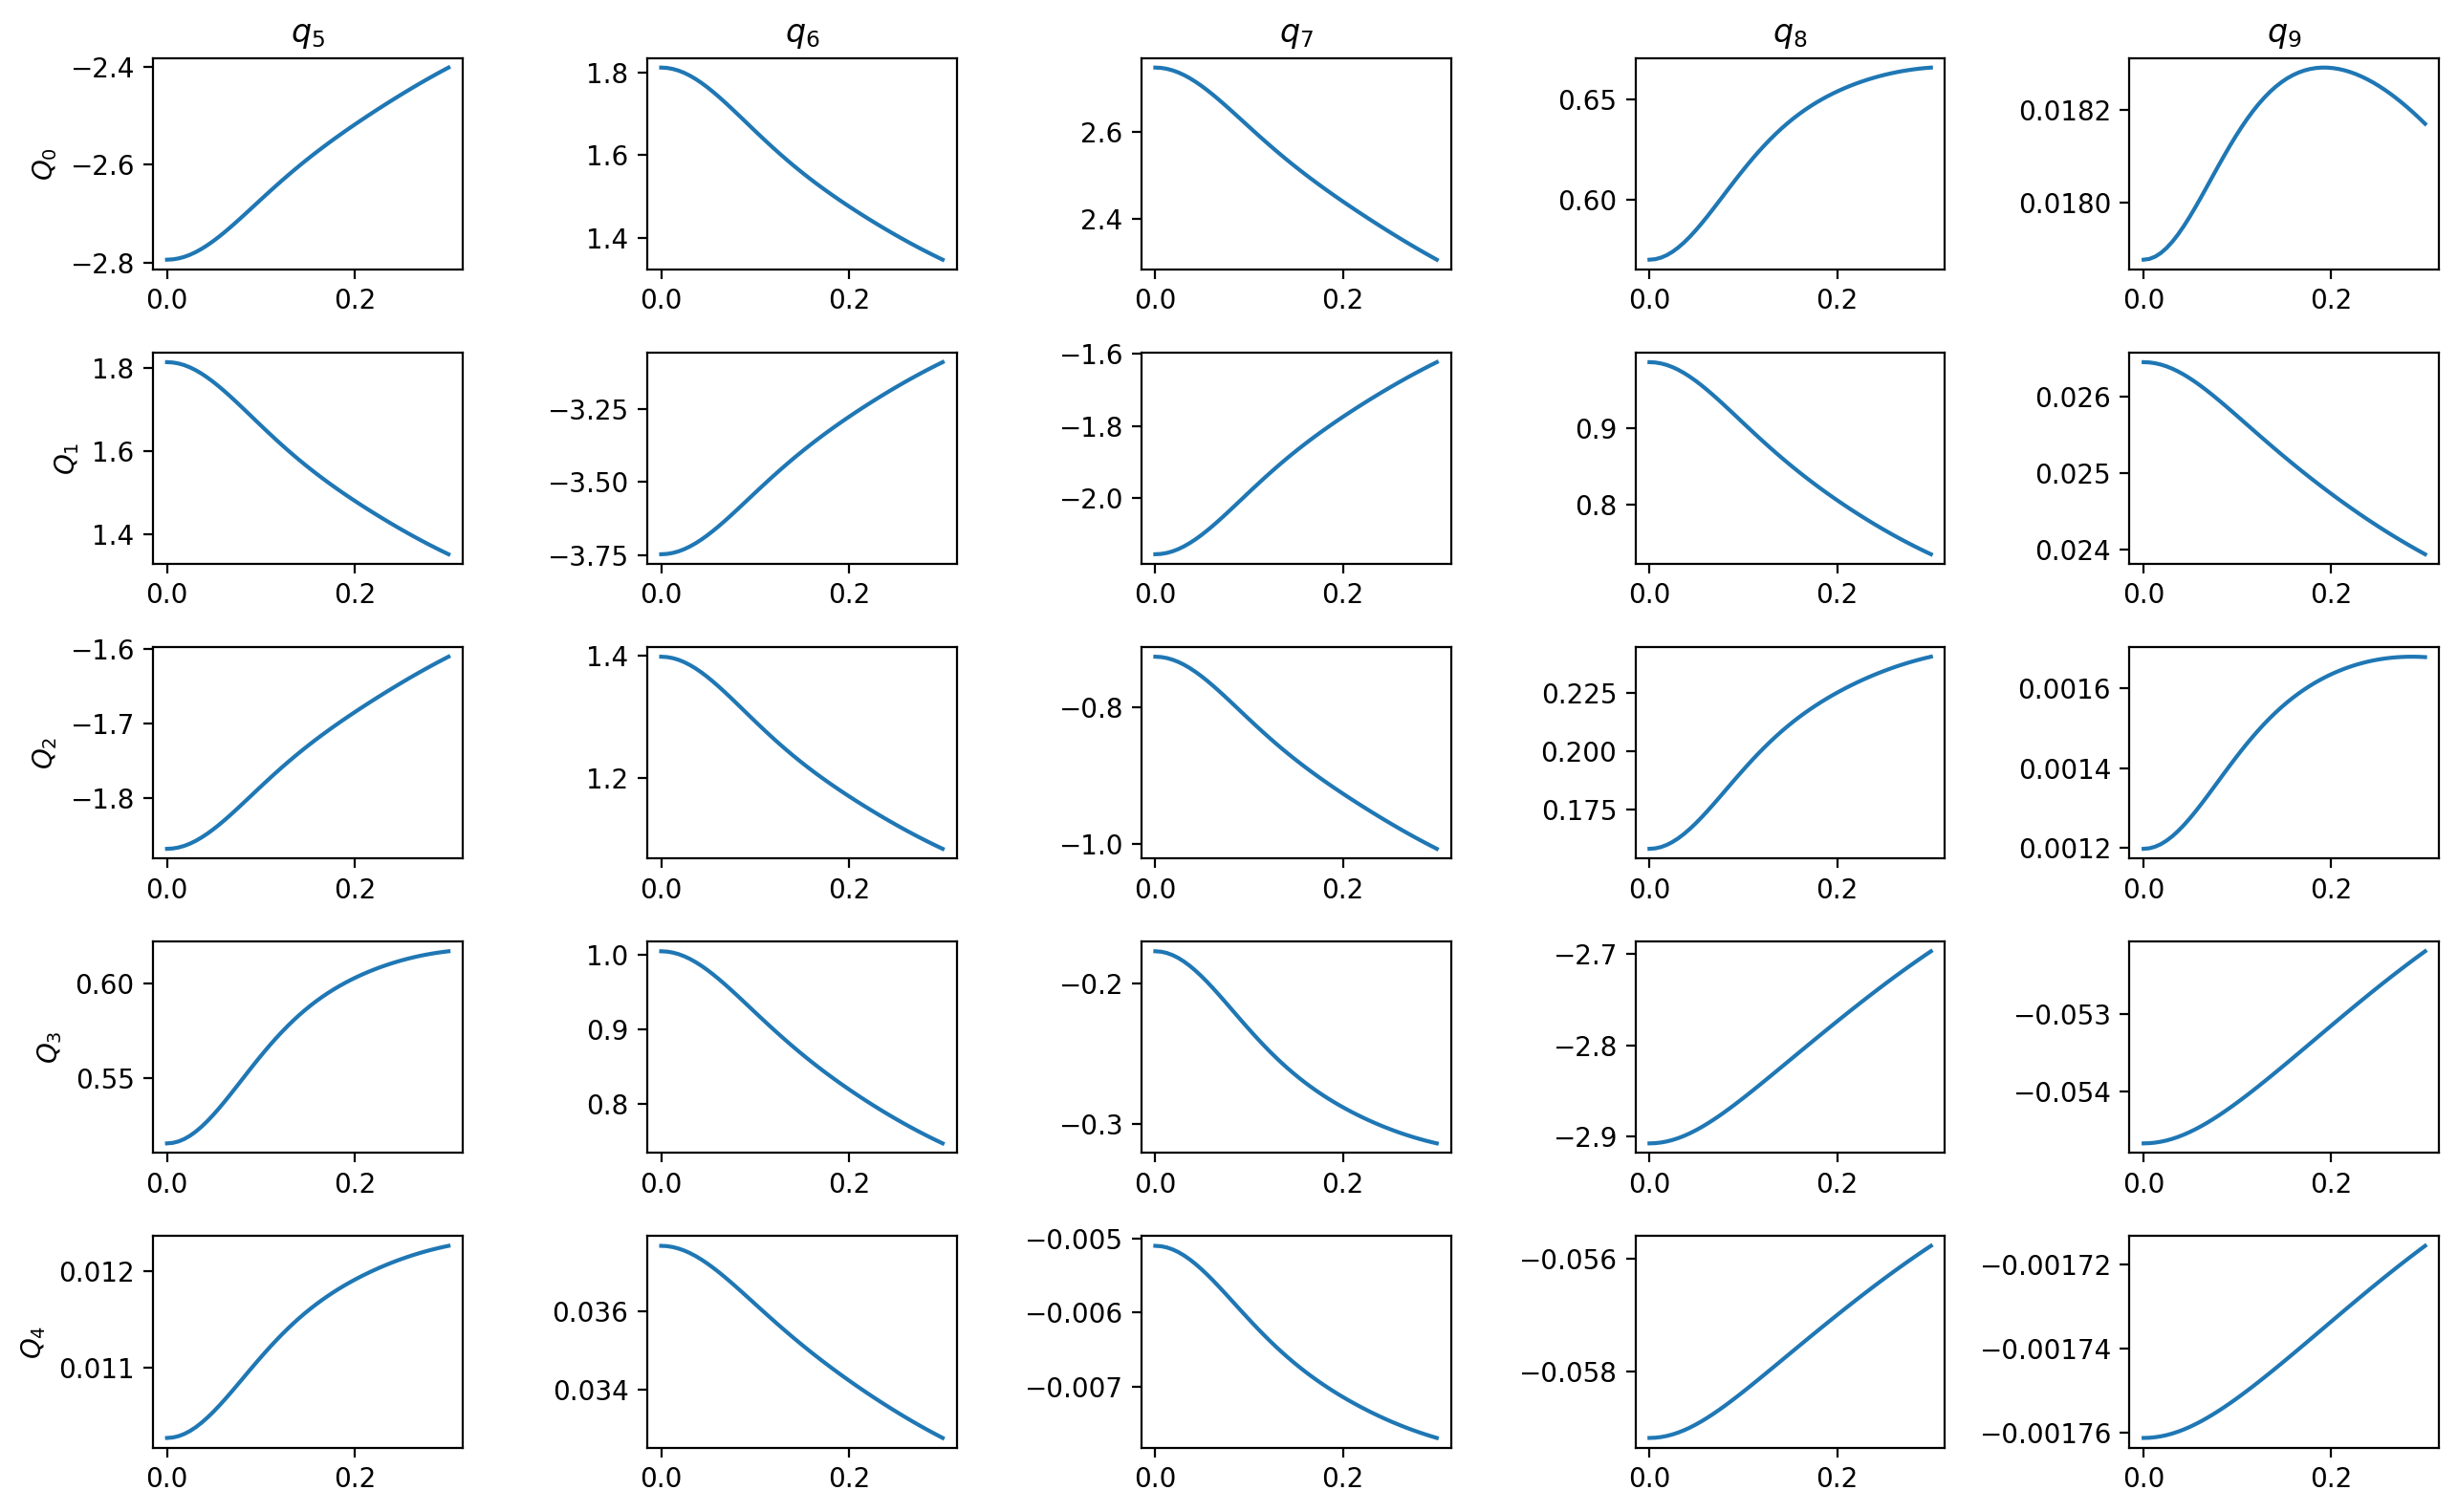

In [299]:
m_list = [5, 6, 7, 8, 9]
p_list = [0, 1, 2, 3, 4]

fig, ax = plt.subplots(nrows=len(p_list), ncols=len(m_list), figsize=(13, 8))

u_inf = 0
for r in range(len(p_list)):
    for c in range(len(m_list)):
        ax[r, c].plot(uvlm['frequency'] * 0.05/10, uvlm['response'][p_list[r], m_list[c], :].real)
#         ax[r, c].plot(uvlm['frequency'] * 0.05/50, uvlm['response'][p_list[r], m_list[c], :].imag / np.max(np.abs(uvlm['response'][p_list[r], m_list[c], :].imag)))
        
#         if r <= 2 and c <= 2:
#             mrmfreq = np.loadtxt(output_path + '/mrm_umbeam_wo_skin_qhh_uinf{:04g}_alpha0500/in{:02g}_out{:02g}.txt'.format(u_inf * 10, m_list[c], p_list[r]))

#             ax[r, c].plot(mrmfreq[mrmfreq[:, 0]<=0.3, 0], mrmfreq[mrmfreq[:, 0]<=0.3, 1] / mrmfreq[0, 1], c=cmap2(nrm(u_inf*0+100)), ls='--')
#         ax[r, c].plot(mrmfreq[:, 0], mrmfreq[:, 1] / mrmfreq[0, 1], c=cmap2(nrm(u_inf*0+100)), ls='--')


#         ax[r, c].set_xlim(0, 0.3)
        
        if c == 0:
            ax[r, c].set_ylabel('$Q_%g$'% r)
        if r == 0:
            ax[r, c].set_title('$q_%g$'% m_list[c])
        if r == 4:
#             ax[r, c].set_xlabel('Reduced Frequency, k')
            pass
    
# plt.autoscale()
# plt.suptitle('SHARPy - not scaled - undeformed - resolved to k=0.3')
plt.tight_layout()

In [285]:
path_to_freqresp = './output/test_single_nyquist_pazy_M16N1Ms16_alpha0000_skin0/pazy_uinf0100_alpha0000/frequencyresponse/aerodynamic.freqresp.h5'
with h5py.File(path_to_freqresp, 'r') as f:
    uvlm = h5utils.load_h5_in_dict(f)

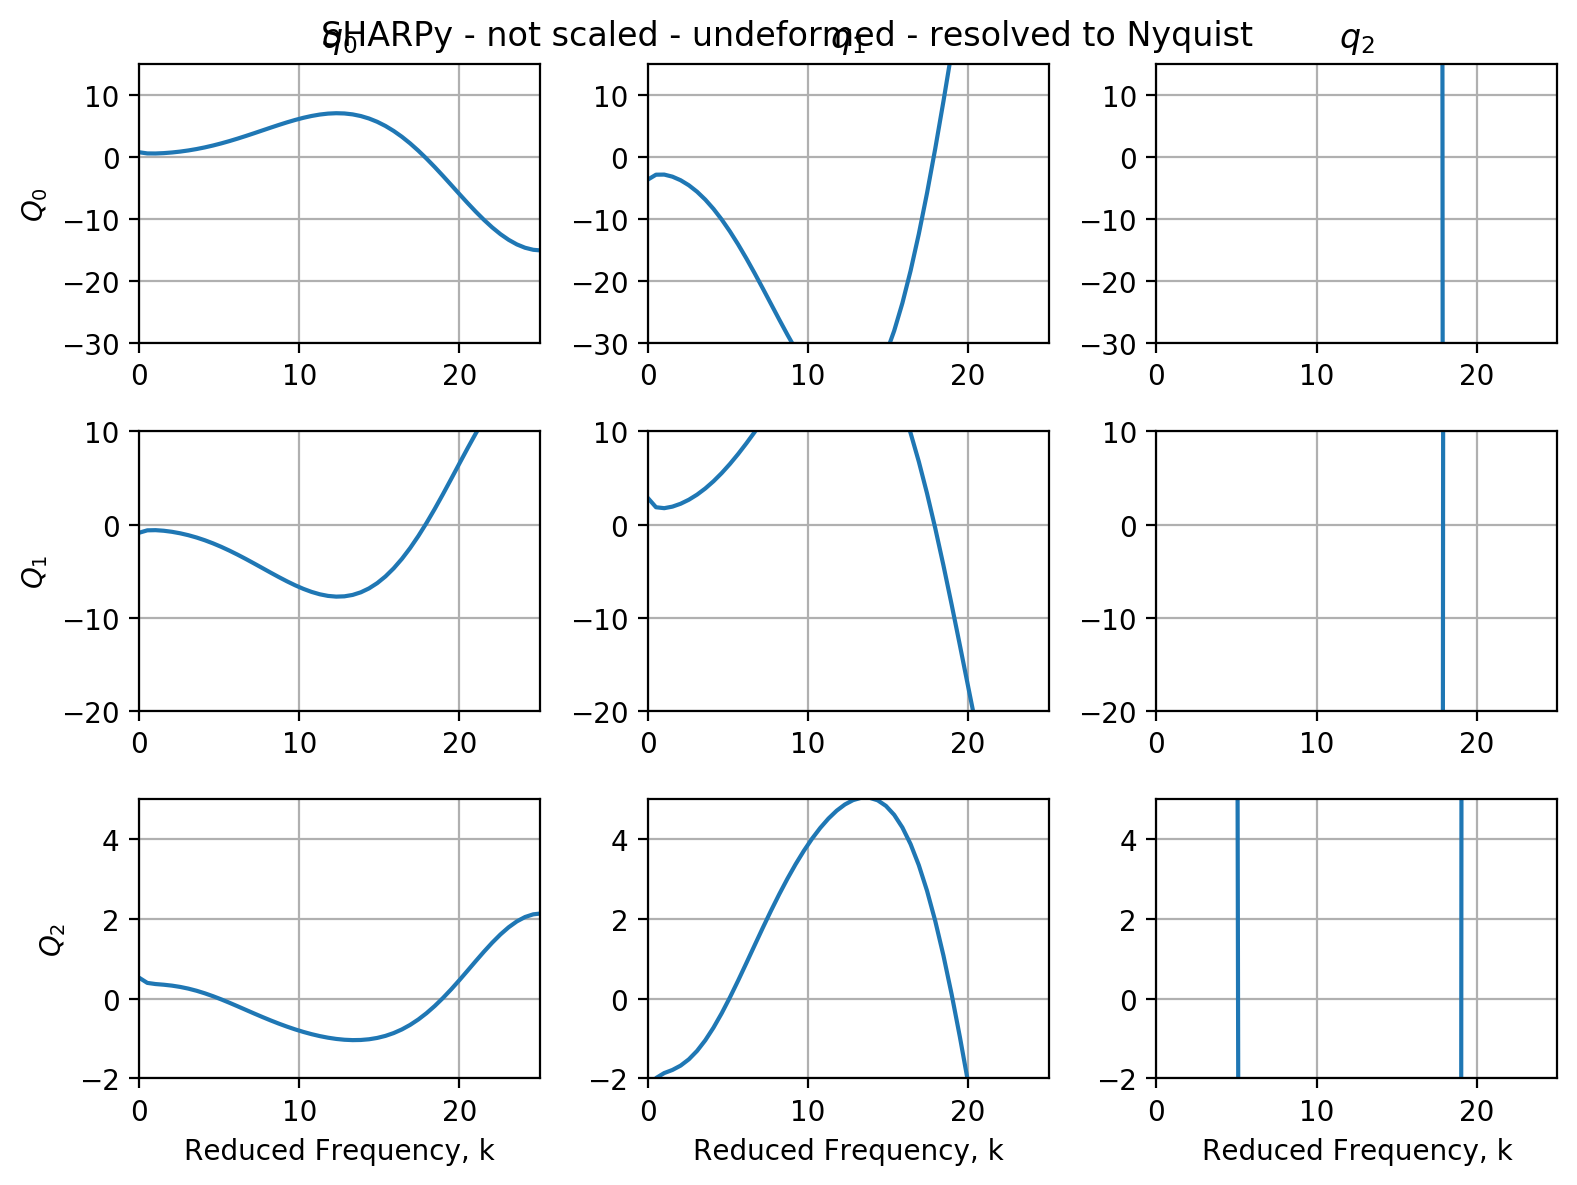

In [266]:
m_list = [0, 1, 2]
p_list = [0, 1, 2]

fig, ax = plt.subplots(nrows=len(p_list), ncols=len(m_list))

u_inf = 0
for r in range(len(p_list)):
    for c in range(len(m_list)):
        ax[r, c].plot(uvlm['frequency'] * 0.05/10, uvlm['response'][p_list[r], m_list[c], :].real/ uvlm['response'][p_list[r], m_list[c], 0].real)
#         ax[r, c].plot(uvlm['frequency'] * 0.05/50, uvlm['response'][p_list[r], m_list[c], :].imag / np.max(np.abs(uvlm['response'][p_list[r], m_list[c], :].imag)))
        
#         if r <= 2 and c <= 2:
#             mrmfreq = np.loadtxt(output_path + '/mrm_umbeam_wo_skin_qhh_uinf{:04g}_alpha0500/in{:02g}_out{:02g}.txt'.format(u_inf * 10, m_list[c], p_list[r]))

#             ax[r, c].plot(mrmfreq[mrmfreq[:, 0]<=0.3, 0], mrmfreq[mrmfreq[:, 0]<=0.3, 1] / mrmfreq[0, 1], c=cmap2(nrm(u_inf*0+100)), ls='--')
#         ax[r, c].plot(mrmfreq[:, 0], mrmfreq[:, 1] / mrmfreq[0, 1], c=cmap2(nrm(u_inf*0+100)), ls='--')

#         ax[r, c].scatter(4 * np.pi, 0)
        ax[r, c].set_xlim(0, 25.03 )
        ax[r, c].grid()
        if c == 0:
            ax[r, c].set_ylabel('$Q_%g$'% r)
        
        if r == 1:
            ax[r, c].set_ylim(-20, 10)
        if r == 0:
            ax[r, c].set_title('$q_%g$'% c)
            ax[r, c].set_ylim(-30, 15)
        if r == 2:
            ax[r, c].set_xlabel('Reduced Frequency, k')
            ax[r, c].set_ylim(-2, 5)
        

    
# plt.autoscale()
plt.suptitle('SHARPy - not scaled - undeformed - resolved to Nyquist')
plt.tight_layout()



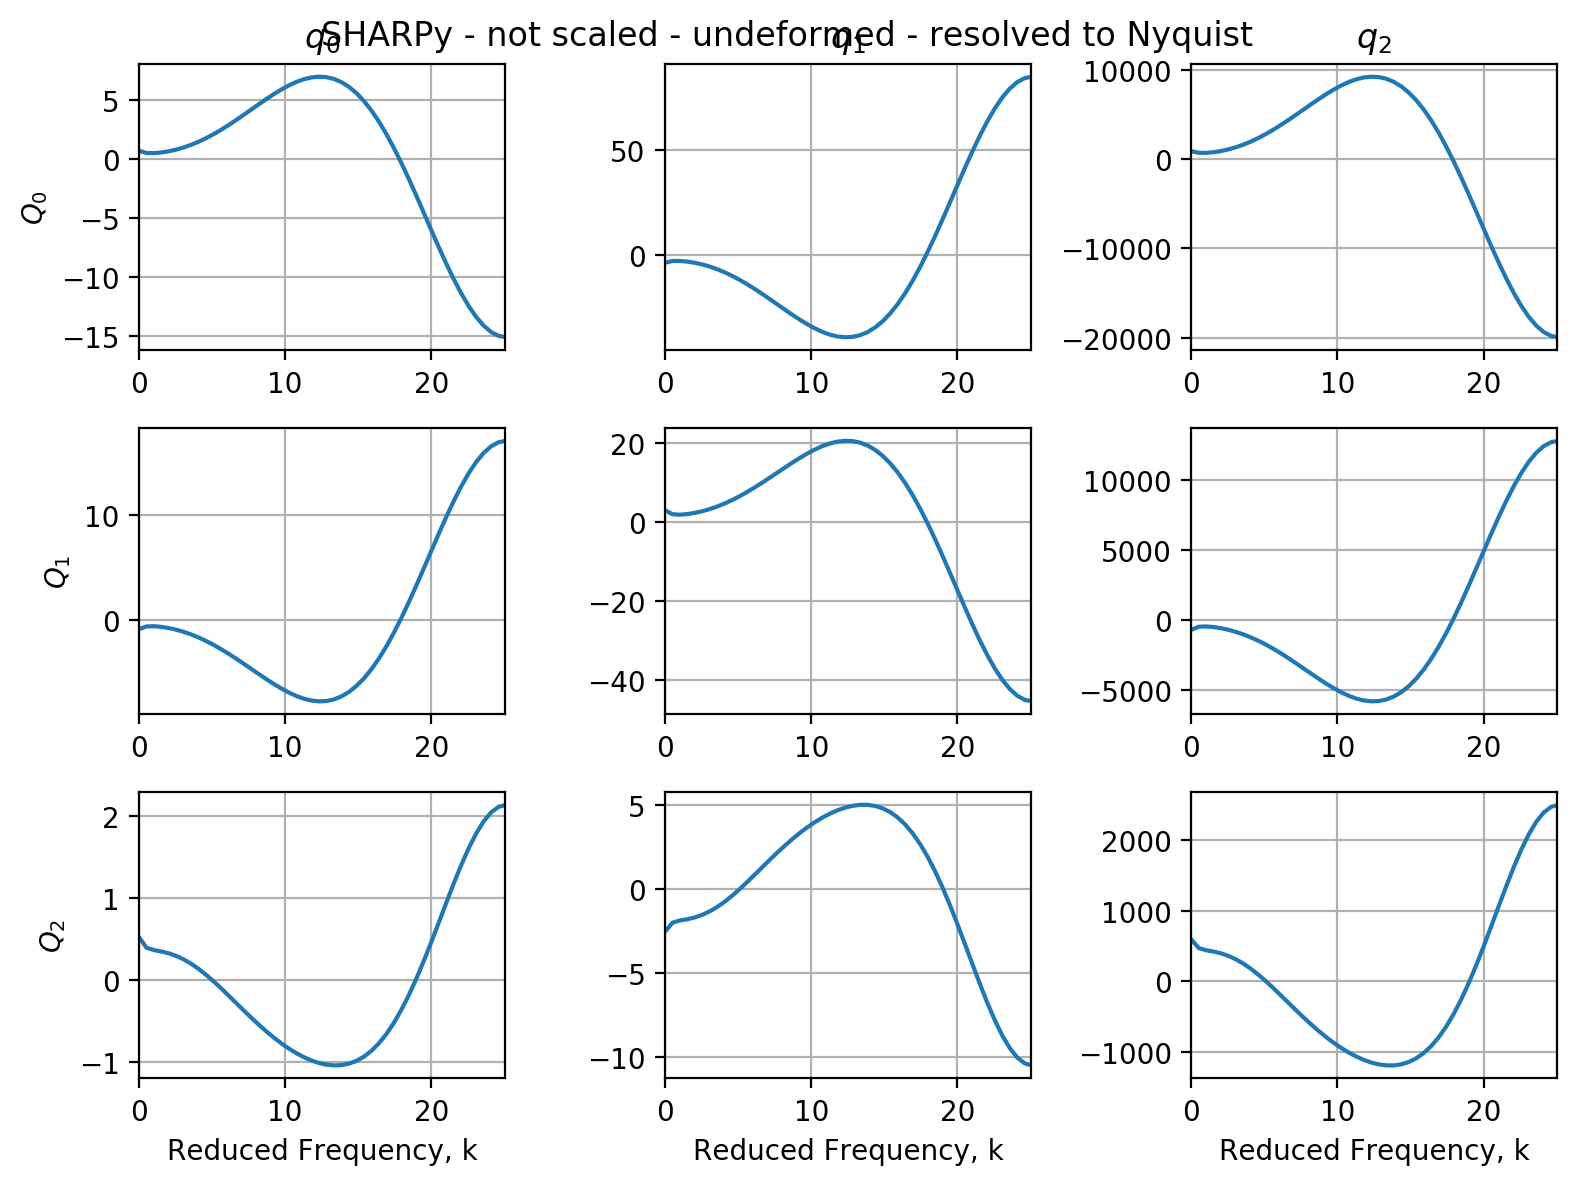

In [268]:
m_list = [0, 1, 2]
p_list = [0, 1, 2]

fig, ax = plt.subplots(nrows=len(p_list), ncols=len(m_list))

u_inf = 0
for r in range(len(p_list)):
    for c in range(len(m_list)):
        ax[r, c].plot(uvlm['frequency'] * 0.05/10, uvlm['response'][p_list[r], m_list[c], :].real)
#         ax[r, c].plot(uvlm['frequency'] * 0.05/50, uvlm['response'][p_list[r], m_list[c], :].imag / np.max(np.abs(uvlm['response'][p_list[r], m_list[c], :].imag)))
        
#         if r <= 2 and c <= 2:
#             mrmfreq = np.loadtxt(output_path + '/mrm_umbeam_wo_skin_qhh_uinf{:04g}_alpha0500/in{:02g}_out{:02g}.txt'.format(u_inf * 10, m_list[c], p_list[r]))

#             ax[r, c].plot(mrmfreq[mrmfreq[:, 0]<=0.3, 0], mrmfreq[mrmfreq[:, 0]<=0.3, 1] / mrmfreq[0, 1], c=cmap2(nrm(u_inf*0+100)), ls='--')
#         ax[r, c].plot(mrmfreq[:, 0], mrmfreq[:, 1] / mrmfreq[0, 1], c=cmap2(nrm(u_inf*0+100)), ls='--')

#         ax[r, c].scatter(4 * np.pi, 0)
        ax[r, c].set_xlim(0, 25.03 )
        ax[r, c].grid()
        if c == 0:
            ax[r, c].set_ylabel('$Q_%g$'% r)
        

        if r == 0:
            ax[r, c].set_title('$q_%g$'% c)

        if r == 2:
            ax[r, c].set_xlabel('Reduced Frequency, k')

        

    
# plt.autoscale()
plt.suptitle('SHARPy - not scaled - undeformed - resolved to Nyquist')
plt.tight_layout()

In [263]:
uvlm['response'][2, 2, :].real / uvlm['response'][2, 2, 0].real

array([ 1.        ,  0.79338868,  0.74234061,  0.71037934,  0.66625473,
        0.60344041,  0.51958413,  0.41432934,  0.28894997,  0.14599015,
       -0.01115893, -0.17866514, -0.35259461, -0.52916775, -0.70493461,
       -0.87687907, -1.04246284, -1.19961939, -1.34670672, -1.48242714,
       -1.60572195, -1.71564892, -1.8112509 , -1.8914247 , -1.95479971,
       -1.9996365 , -2.02375587, -2.02450861, -1.99879563, -1.94314631,
       -1.85386078, -1.72721759, -1.55974407, -1.34854025, -1.09164086,
       -0.78839323, -0.43982224, -0.04894874,  0.37897468,  0.83634633,
        1.31324721,  1.79764403,  2.27577241,  2.73269316,  3.15299654,
        3.52161188,  3.82466514,  4.05031662,  4.18950791,  4.23655141])

In [262]:
uvlm['response'][2, 1, :].real / uvlm['response'][2, 1, 0].real

array([ 1.        ,  0.7882722 ,  0.73861349,  0.70778217,  0.66446677,
        0.60213811,  0.51848855,  0.4132428 ,  0.28778158,  0.14476901,
       -0.01228334, -0.17943464, -0.35266412, -0.52813465, -0.70237241,
       -0.87237233, -1.03564025, -1.19018226, -1.3344509 , -1.46725685,
       -1.587655  , -1.6948135 , -1.78787514, -1.86582057, -1.92734365,
       -1.97074924, -1.993884  , -1.99411025, -1.96833193, -1.91307995,
       -1.82466149, -1.69937388, -1.53377909, -1.32502875, -1.07122353,
       -0.77178415, -0.42780531, -0.04235982,  0.3792821 ,  0.82955185,
        1.2986283 ,  1.7746499 ,  2.24409985,  2.69235533,  3.10437536,
        3.46548536,  3.76220319,  3.98304224,  4.11922504,  4.16524489])